In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from ipynb.fs.full.Funciones_basicas import *
from ipynb.fs.full.Algoritmos import *
from ipynb.fs.full.Visualizaciones import *

In [3]:
from collections import deque
import random

In [4]:
path_nodes = '../data_random/TG.txt'
nodes_location = pd.read_csv(path_nodes, sep=" ", header=None, names = ['ID', 'Longitude', 'Latitude'])
path_edges = '../data_random/TG_edge.txt'
edges_location = pd.read_csv(path_edges, sep=" ", header=None, names = ['edge_ID', 'ID_1', 'ID_2', 'Distance'])
edges_location.head()

edge_ID  ID_1  ID_2    Distance
0        0     0  7388    1.410871
1        1     0  5744    1.069441
2        2     0  5835   34.071991
3        3     0  3647   14.796446
4        4     1  4232  136.073166

In [5]:
S = set()
for index, row in edges_location.iterrows():
    origin = row['ID_1']
    dest = row['ID_2']
    S.add(origin)
    S.add(dest)

S = list(S)
id_ = {}; _id = {}; l = 0
for u in S:
    id_[u] = l; _id[l] = u
    l += 1

        
G_SJ = nx.Graph()
for index, row in edges_location.iterrows():
    origin = row['ID_1']
    dest = row['ID_2']
    G_SJ.add_edge(id_[origin], id_[dest])
    
N_ = l

In [6]:
def by_distance(element):
    return element[1]


def get_closest(G, locations, node, q):
    # get position of node
    x = locations[locations['ID'] == _id[node]]['Longitude'].iloc[0]
    y = locations[locations['ID'] == _id[node]]['Latitude'].iloc[0]
    
    #Neighbors
    ng = list(G.neighbors(node))
    
    # Calculate distances
    distances = list()
    for n in ng:
        n_id = _id[n]
        x_row = locations[locations['ID'] == n_id]['Longitude'].iloc[0]
        y_row = locations[locations['ID'] == n_id]['Latitude'].iloc[0]
        d = (x - x_row)**2 + (y - y_row)**2
        distances.append((n, d))
    
    # Order by distance and return q closest
    distances.sort(key = by_distance)    
    return [i[0] for i in distances[:q]] 

In [7]:
def get_random_tree(G, nodes):
    new_G = nx.DiGraph()
    N = len(G.nodes())
    WTP = random.choice(list(G.nodes()))
    V = [0] * N;  V[WTP] = 1
    Q = deque([]); Q.append(WTP)
    while Q:
        if len(new_G.nodes()) < nodes:
            random.shuffle(Q)
            u = Q.popleft()
            for v in G.neighbors(u):
                if not V[v]:
                    Q.append(v)
                    new_G.add_edge(v,u)
                    V[v] = 1
        else:
            break
    return new_G, WTP

def add_extra_edges(T, G, locations, ratio, edge_limit):
    nodes = []
    for u in T.nodes():
        if u in G.nodes():
            nodes.append(u)
    counter = 0
    perturbed = random.choices(nodes, k = math.ceil(len(nodes) * ratio))
    for node in perturbed:
        added = False
        if len(list(T.predecessors(node))) < edge_limit:
            closest = [i for i in get_closest(G, locations, node, 7) if i in nodes]
            if closest:
                closest = closest[0]
                T_neigbors = list(T.predecessors(node)) + list(T.successors(node))
                if len(list(T.predecessors(closest))) < edge_limit and  closest not in T_neigbors:
                    T.add_edge(node, closest)
                    added = True
                    #print('added')
        if not added and counter < len(nodes):
            perturbed.append(random.choice(nodes))
            counter += 1
    return T


In [8]:
def generate_random_graph(G, nodes, locations, ratio, edge_limit):
    T, WTP = get_random_tree(G, nodes)
    NG = add_extra_edges(T, G, locations, ratio, edge_limit)
    return NG, WTP
        

In [9]:
T, _ = get_random_tree(G_SJ, 5000)

S = []
for n in T.nodes():
    S.append((get_size(T, [0 for i in range(N_)], n), n))

S.sort(reverse=True)

r = S[0][1]

R = T.reverse()
F = get_optimal_function(R, N_)
iters = simulate(R, N_, F, r, T.nodes())

KeyboardInterrupt: 

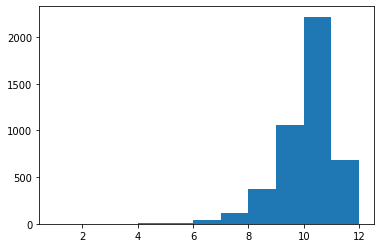

In [10]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [12]:
T, _ = get_random_tree(G_SJ, 9000)

S = []
for n in T.nodes():
    S.append((get_size(T, [0 for i in range(N_)], n), n))

S.sort(reverse=True)

r = S[0][1]

R = T.reverse()
F = get_optimal_function(R, N_)
iters = simulate(R, N_, F, r, T.nodes())

Optimal Steps: 10
Result 7250: 9    acc: 9.0    ks: [2, 9, 2, 2, 2, 2, 1, 1, 1]
13758!!!
Result 11837: 7    acc: 8.0    ks: [2, 9, 2, 2, 2, 2, 1]
Result 10998: 8    acc: 8.0    ks: [2, 9, 2, 2, 2, 5, 2, 2]
Result 16053: 8    acc: 8.0    ks: [2, 9, 2, 2, 2, 2, 1, 1]
Result 10701: 10    acc: 8.4    ks: [2, 9, 2, 2, 2, 5, 2, 2, 1, 1]
Result 15615: 7    acc: 8.166666666666666    ks: [2, 9, 2, 2, 2, 5, 1]
Result 14952: 10    acc: 8.428571428571429    ks: [2, 9, 2, 2, 2, 5, 2, 2, 1, 1]
Result 11365: 8    acc: 8.375    ks: [2, 9, 2, 2, 2, 2, 1, 1]
Result 1273: 8    acc: 8.333333333333334    ks: [2, 9, 2, 2, 2, 2, 1, 1]
Result 5832: 8    acc: 8.3    ks: [2, 9, 2, 2, 2, 2, 1, 1]
Result 13466: 8    acc: 8.272727272727273    ks: [2, 9, 2, 2, 2, 2, 1, 1]
Result 11267: 9    acc: 8.333333333333334    ks: [2, 9, 2, 2, 2, 2, 1, 1, 1]
Result 14229: 8    acc: 8.307692307692308    ks: [2, 9, 2, 2, 2, 2, 1, 1]
Result 16881: 9    acc: 8.357142857142858    ks: [2, 9, 2, 2, 2, 2, 1, 1, 1]
Result 2208: 10    

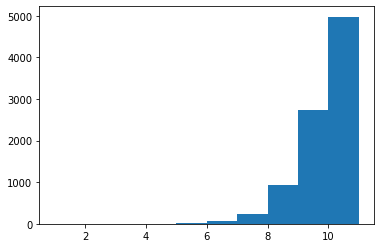

In [13]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [14]:
T, _ = get_random_tree(G_SJ, 4500)

S = []
for n in T.nodes():
    S.append((get_size(T, [0 for i in range(N_)], n), n))

S.sort(reverse=True)

r = S[0][1]

R = T.reverse()
F = get_optimal_K_function(R, 5, N_)
iters = simulate(R, N_, F, r, T.nodes())

Optimal Steps: 6
Result 10650: 6    acc: 6.0    ks: [4, 2, 5, 5, 5, 4]
13131!!!
Result 10954: 5    acc: 5.5    ks: [4, 2, 5, 1, 2]
Result 6197: 5    acc: 5.333333333333333    ks: [4, 2, 5, 1, 2]
Result 2439: 5    acc: 5.25    ks: [4, 2, 5, 1, 2]
Result 7311: 5    acc: 5.2    ks: [4, 4, 2, 1, 4]
Result 11337: 6    acc: 5.333333333333333    ks: [4, 2, 5, 2, 3, 4]
Result 18154: 6    acc: 5.428571428571429    ks: [4, 2, 5, 5, 5, 4]
Result 3133: 5    acc: 5.375    ks: [4, 4, 2, 2, 4]
Result 12496: 6    acc: 5.444444444444445    ks: [4, 4, 2, 1, 4, 3]
Result 3004: 6    acc: 5.5    ks: [4, 2, 5, 5, 5, 4]
Result 6469: 6    acc: 5.545454545454546    ks: [4, 2, 5, 5, 5, 4]
Result 17416: 6    acc: 5.583333333333333    ks: [4, 2, 5, 2, 3, 4]
Result 14039: 6    acc: 5.615384615384615    ks: [4, 2, 5, 2, 3, 4]
Result 1181: 6    acc: 5.642857142857143    ks: [4, 2, 5, 5, 5, 4]
Result 11486: 5    acc: 5.6    ks: [4, 2, 5, 5, 5]
Result 3429: 6    acc: 5.625    ks: [4, 2, 5, 5, 5, 4]
Result 8933: 6    a

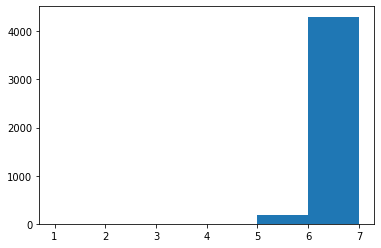

In [15]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [16]:
T, _ = get_random_tree(G_SJ, 9000)

S = []
for n in T.nodes():
    S.append((get_size(T, [0 for i in range(N_)], n), n))

S.sort(reverse=True)

r = S[0][1]

R = T.reverse()
F = get_optimal_K_function(R, 5, N_)
iters = simulate(R, N_, F, r, T.nodes())

Optimal Steps: 7
Result 5658: 7    acc: 7.0    ks: [1, 2, 5, 1, 1, 5, 4]
2956!!!
Result 12495: 6    acc: 6.5    ks: [1, 4, 4, 5, 1, 4]
Result 11555: 7    acc: 6.666666666666667    ks: [1, 2, 5, 1, 1, 5, 4]
Result 8511: 7    acc: 6.75    ks: [1, 2, 5, 1, 1, 5, 4]
Result 11110: 7    acc: 6.8    ks: [1, 2, 5, 5, 4, 4, 3]
Result 12625: 6    acc: 6.666666666666667    ks: [1, 4, 4, 5, 1, 4]
Result 10732: 7    acc: 6.714285714285714    ks: [1, 2, 5, 5, 4, 4, 3]
Result 12851: 6    acc: 6.625    ks: [1, 4, 4, 5, 1, 4]
Result 2850: 7    acc: 6.666666666666667    ks: [1, 2, 4, 2, 4, 4, 2]
Result 8513: 7    acc: 6.7    ks: [1, 2, 5, 5, 4, 4, 3]
Result 13395: 7    acc: 6.7272727272727275    ks: [1, 2, 5, 5, 4, 4, 2]
Result 7188: 6    acc: 6.666666666666667    ks: [1, 2, 5, 5, 4, 3]
Result 8509: 7    acc: 6.6923076923076925    ks: [1, 2, 5, 5, 4, 5, 3]
Result 8510: 7    acc: 6.714285714285714    ks: [1, 2, 5, 5, 4, 4, 3]
Result 12895: 6    acc: 6.666666666666667    ks: [1, 4, 4, 5, 1, 4]
Result 1303

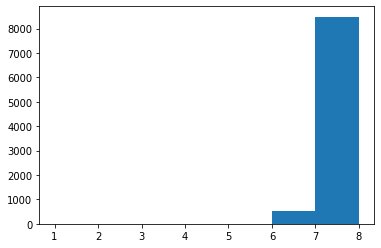

In [17]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [30]:

def greedyAppBasic(G, V_, root, K, limit):
    
    V = V_.copy(); N = len(V)
    E = {u for u in G.nodes() if not V[u]}

    ans = []; tot = 0
    while len(ans) < K:
        
        maxv = 0; u = -1
        for v in E:
            s = len(get_ideal(G, V, v))
            if s > maxv and s <= limit:
                u = v
                maxv = s
        if u == -1:
            break
        
        V, _ = visit(G, V, u)
        ans.append(u); tot += maxv
        E.remove(u)
        
    return ans, tot

In [36]:
def simulate_basic(G, N, root, k, S, verbose=False):
    
    map_prev = {}
    
    iters = []; N_ = len(G.nodes())

    for r in S:

        if verbose:
            print(r)

        CV = [0 for u in range(N)]

        CV[r] = 1
        Q = deque([]); Q.append(r)
        while Q:
            u = Q.popleft()
            for v in G.successors(u):
                if not CV[v]:
                    CV[v] = 1
                    Q.append(v)

        V = [0] * N

        R = N_
        for t in range(100):
            
            R = N_ - sum(V)
            P = []; sP = 0
            
            # if not verbose:
            #     print("                                                           ", end="\r")
            #     print(f"Search {r}: {t + 1}    now: {R}", end="\r")
            
            if verbose:
                print("it,", t, R)
                
            nn = 0
            for i in range(N):
                if V[i]:
                    nn += 2**i
                    
            if nn in map_prev.keys():
                P = map_prev[nn]
            else:
                if R >= k:
                    low = 0; high = R
                    while low != high:
                        mid = (low + high) // 2
                        P, sP = greedyAppBasic(G, V, root, k, mid)
                        if R - sP < mid:
                            high = mid
                        else:
                            low = mid + 1
                    P, sP = greedyAppBasic(G, V, root, k, low)
                    
                    if verbose:
                        print("pre low:", low, R - sP, len(P))

                    if low > 1:
                        P_, sP_ = greedyAppBasic(G, V, root, k, low - 1)

                        if verbose:
                            print("low:", low, R - sP, R - sP_, len(P), len(P_))

                        if len(P_) and (abs((R - sP_) - (low - 1)) < abs((R - sP) - low) or (len(P) == 1 and sP == R)):
                            P = P_; sP = sP_
                else:
                    P, sP = greedyAppBasic(G, V, root, k, 1)

                map_prev[nn] = P
    
            if verbose:
                print("nx", len(P), sum([CV[u] for u in P]), N_ - sum(V))
                print("P: ", ' '.join([str(p) for p in P]))
#                 plot_sample_no_intersections(G, V, P, geometry, _id)

            if sum([CV[u] for u in P]):
                V_ = [-1 * V[u] for u in range(N)]
                for u in P:
                    if CV[u]:
                        I = get_ideal(G, V, u)
                        for v in I:
                            V_[v] += 1

                V = [(V_[u] != sum([CV[u] for u in P])) for u in range(N)]
                
                if verbose:
                    print("if: ", N_ - sum(V))
            
            for u in P:
                if not CV[u]:
                    I = get_ideal(G, V, u)
                    for v in I:
                        V[v] = 1
                        
            size = N_ - sum(V)

            if size == 1:
                iters.append(t + 1)
                print(f"Result {r}: {iters[-1]}    acc: {sum(iters) / len(iters)}")
                break
            if size <= k:
                iters.append(t + 2)
                print(f"Result {r}: {iters[-1]}    acc: {sum(iters) / len(iters)}")
                break
            if t == 99:
                iters.append(100)
                print(f"Result {r}: {iters[-1]}    acc: {sum(iters) / len(iters)}")

    print(sum(iters) / len(iters), max(iters))
    
    return iters

In [37]:
T, _ = get_random_tree(G_SJ, 4500)

S = []
for n in T.nodes():
    S.append((get_size(T, [0 for i in range(N_)], n), n))

S.sort(reverse=True)

r = S[0][1]

# R = T.reverse()
iters = simulate_basic(T, N_, r, 5, T.nodes())

Result 10509: 6    acc: 6.0
Result 10537: 5    acc: 5.5
Result 10538: 3    acc: 4.666666666666667
Result 10014: 3    acc: 4.25
Result 11115: 3    acc: 4.0
Result 10593: 3    acc: 3.8333333333333335
Result 9924: 3    acc: 3.7142857142857144
Result 10104: 3    acc: 3.625
Result 9789: 3    acc: 3.5555555555555554
Result 11757: 3    acc: 3.5
Result 11145: 3    acc: 3.4545454545454546
Result 11843: 3    acc: 3.4166666666666665
Result 11803: 3    acc: 3.3846153846153846
Result 10052: 6    acc: 3.5714285714285716
Result 10268: 6    acc: 3.7333333333333334
Result 11302: 5    acc: 3.8125
Result 11114: 5    acc: 3.8823529411764706
Result 12004: 5    acc: 3.9444444444444446
Result 9788: 6    acc: 4.052631578947368
Result 10973: 4    acc: 4.05
Result 11889: 5    acc: 4.095238095238095
Result 10324: 2    acc: 4.0
Result 10936: 4    acc: 4.0
Result 11801: 4    acc: 4.0
Result 8926: 3    acc: 3.96
Result 12585: 5    acc: 4.0
Result 9507: 2    acc: 3.925925925925926
Result 10213: 2    acc: 3.857142857

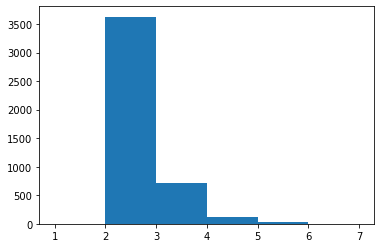

In [38]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [39]:
T, _ = get_random_tree(G_SJ, 9000)

S = []
for n in T.nodes():
    S.append((get_size(T, [0 for i in range(N_)], n), n))

S.sort(reverse=True)

r = S[0][1]

# R = T.reverse()
iters = simulate_basic(T, N_, r, 5, T.nodes())

Result 16930: 5    acc: 5.0
Result 17380: 6    acc: 5.5
Result 17282: 3    acc: 4.666666666666667
Result 17828: 2    acc: 4.0
Result 17425: 6    acc: 4.4
Result 597: 6    acc: 4.666666666666667
Result 17470: 6    acc: 4.857142857142857
Result 17002: 6    acc: 5.0
Result 17921: 2    acc: 4.666666666666667
Result 17610: 6    acc: 4.8
Result 17761: 2    acc: 4.545454545454546
Result 17827: 2    acc: 4.333333333333333
Result 18243: 2    acc: 4.153846153846154
Result 76: 2    acc: 4.0
Result 7557: 2    acc: 3.8666666666666667
Result 21: 2    acc: 3.75
Result 462: 2    acc: 3.6470588235294117
Result 18139: 2    acc: 3.5555555555555554
Result 17086: 5    acc: 3.6315789473684212
Result 18053: 6    acc: 3.75
Result 17666: 6    acc: 3.857142857142857
Result 602: 2    acc: 3.772727272727273
Result 217: 2    acc: 3.6956521739130435
Result 911: 2    acc: 3.625
Result 371: 2    acc: 3.56
Result 18052: 2    acc: 3.5
Result 693: 2    acc: 3.4444444444444446
Result 320: 2    acc: 3.392857142857143
Resu

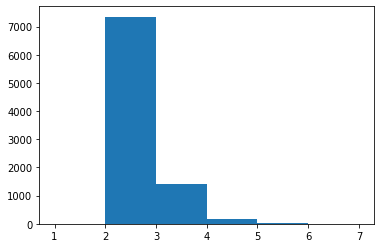

In [40]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [41]:
T, _ = get_random_tree(G_SJ, 18000)

S = []
for n in T.nodes():
    S.append((get_size(T, [0 for i in range(N_)], n), n))

S.sort(reverse=True)

r = S[0][1]

# R = T.reverse()
iters = simulate_basic(T, N_, r, 5, T.nodes())

Result 3247: 6    acc: 6.0
Result 13943: 6    acc: 6.0
Result 10896: 6    acc: 6.0
Result 17701: 6    acc: 6.0
Result 3248: 6    acc: 6.0
Result 3393: 6    acc: 6.0
Result 12812: 6    acc: 6.0
Result 2442: 6    acc: 6.0
Result 3298: 6    acc: 6.0
Result 7389: 6    acc: 6.0
Result 10519: 6    acc: 6.0
Result 2487: 6    acc: 6.0
Result 2822: 6    acc: 6.0
Result 12566: 6    acc: 6.0
Result 17755: 6    acc: 6.0
Result 2419: 6    acc: 6.0
Result 17513: 6    acc: 6.0
Result 1693: 6    acc: 6.0
Result 16004: 6    acc: 6.0
Result 6851: 6    acc: 6.0
Result 1453: 6    acc: 6.0
Result 13846: 6    acc: 6.0
Result 1366: 6    acc: 6.0
Result 5807: 6    acc: 6.0
Result 16965: 6    acc: 6.0
Result 15386: 6    acc: 6.0
Result 1995: 6    acc: 6.0
Result 3105: 6    acc: 6.0
Result 17232: 6    acc: 6.0
Result 13766: 6    acc: 6.0
Result 798: 6    acc: 6.0
Result 1692: 6    acc: 6.0
Result 1141: 6    acc: 6.0
Result 698: 6    acc: 6.0
Result 699: 6    acc: 6.0
Result 1014: 6    acc: 6.0
Result 6165: 6   

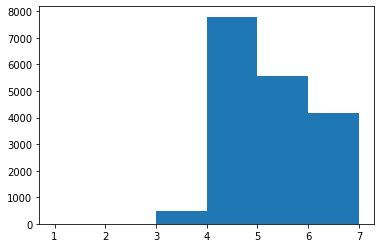

In [42]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [9]:
def get_ideal_robust(G, V_, root, node):
    
    if root == node:
        return get_ideal(G, V_, root)
    
    V = [0 for u in range(len(V_))]
    V[root] = 1
    Q = deque([root])
    while Q:
        u = Q.popleft()
        for v in G.predecessors(u):
            if not V[v] and v != node:
                V[v] = 1
                Q.append(v)

    return [i for i in G.nodes() if (V_[i] == 0 and V[i] == 0)]

def visit_robust(G, V, root, u):
    
    I = get_ideal_robust(G, V, root, u)
    
    V_ = V.copy()
    for u in I:
        V_[u] = 1
    
    return V_, len(I)


def get_size_weight_robust(G, W, V_, root, node):
    N = len(G.nodes())
    
    if V_[node]:
        return 0 , 0
    
    if node == root:
        return N - sum(V_), sum(W) - sum([W[i] for i in G.nodes() if V_[i]])
    
    V = [0] * len(V_)
    
    V[root] = 1; Q = deque([root]);
    while Q:
        u = Q.popleft()
        for v in G.predecessors(u):
            if not V[v] and v != node:
                V[v] = 1
                Q.append(v)
                
    I = [i for i in G.nodes() if (V_[i] == 0 and V[i] == 0)]
    return sum([1 for i in I]), sum([W[i] for i in I])

In [10]:
def greedyAppReduceAll(G, W, V_, root, K, slim, wlim, plim, calcRobust, visitRobust):
    
    V = V_.copy(); N = len(G.nodes()); N_ = len(W)

    ans = []; tot = 0
    while len(ans) < K:
        
        E = []
        
        S = [0 for u in range(N_)]
        SS = [0 for u in range(N_)]
        for v in G.nodes():
            if not V[v]:
                ss = get_size(G, V, v)
                sr = get_size_robust(G, V, root, v)
                if calcRobust:
                    SS[v], S[v] = get_size_weight_robust(G, W, V, root, v)
                else:
                    SS[v], S[v] = get_size_weight(G, W, V, v)
                if (sr / ss) >= plim:
                    E.append(v)
        
        maxv = 0; u = -1
        for v in E:
            s = SS[v]
            if s > maxv and s <= slim and S[v] <= wlim:
                u = v
                maxv = s
            
        if u == -1:
            break
        
        x = None
        if visitRobust:
            V, x = visit_robust(G, V, root, u)
        else:
            V, x = visit(G, V, u)
        ans.append(u); tot += x
        
    return ans, tot

In [11]:
def simulate_robust_randtree(G, root, W, k2, S, plim, calcRobust, visitRobust, verbose, map_prev):
    
    iters = []
    
    N = len(G.nodes())
    N_ = len(W)

    node_it = 0
    for r in S:
        
        node_it += 1

        if verbose:
            print(r)

        CV = [0 for u in range(N_)]

        CV[r] = 1
        Q = deque([]); Q.append(r)
        while Q:
            u = Q.popleft()
            successors = list(G.successors(u))
            if successors:
                v = random.sample(successors, 1)[0]
                CV[v] = 1
                Q.append(v)

        V = [1 for u in range(N_)]
        for u in G.nodes():
            V[u] = 0

        R = N
        for t in range(100):
            
            R = N_ - sum(V); P = []; sP = 0
            
            if not verbose:
                print("                                                           ", end="\r")
                print(f"Search {r}: {t + 1}    now: {R}", end="\r")
            
            if verbose:
                print("it,", t, R)
                
            nn = 0
            for i in G.nodes():
                if V[i]:
                    nn += 2**i
            
            if nn in map_prev.keys():
                P = map_prev[nn]
            else:
                if R > N / 10:
                    P, sP = greedyAppReduceAll(G, W, V, root, k2, R / 3, 1e8, plim, calcRobust, visitRobust)
                elif R >= 10:
                    low = 0; high = R
                    while low != high:
                        mid = (low + high) // 2
                        P, sP = greedyAppReduceAll(G, W, V, root, k2, mid, 1e8, plim, calcRobust, visitRobust)
                        if R - sP < mid:
                            high = mid
                        else:
                            low = mid + 1
                    P, sP = greedyAppReduceAll(G, W, V, root, k2, low, 1e8, plim, calcRobust, visitRobust)
                    
                    if verbose:
                        print("pre low:", low, R - sP)

                    if low > 1:
                        P_, sP_ = greedyAppReduceAll(G, W, V, root, k2, low - 1, 1e8, plim, calcRobust, visitRobust)

                        if verbose:
                            print("low:", low, R - sP, R - sP_)

                        if abs((R - sP_) - (low - 1)) < abs((R - sP) - low) or (len(P) == 1 and sP == R):
                            P = P_; sP = sP_
                else:
                    P, sP = greedyAppReduceAll(G, W, V, root, k2, 1, 1e8, plim, calcRobust, visitRobust)

                map_prev[nn] = P
    
            if verbose:
                print("nx", len(P), sum([CV[u] for u in P]), N - sum(V))
                print("P: ", ' '.join([str(p) for p in P]))

            if sum([CV[u] for u in P]):
                V_ = [-1 * V[u] for u in range(N_)]
                for u in P:
                    if CV[u]:
                        I = get_ideal(G, V, u)
                        for v in I:
                            V_[v] += 1

                V = [(V_[u] != sum([CV[u] for u in P])) for u in range(N_)]
                
                if verbose:
                    print("if: ", N_ - sum(V))
            
            for u in P:
                if not CV[u]:
                    I = get_ideal_robust(G, V, root, u)
                    for v in I:
                        V[v] = 1
                        
            size = N_ - sum(V)
            weight = sum([W[u] for u in range(N_) if not V[u]])
            
            if verbose:
                print(size, weight)

            if size == 1 or weight <= 200:
                iters.append(t + 1)
                print(f"[{node_it}] Result {r}: {iters[-1]}    acc: {sum(iters) / len(iters)}")
                break
            if size <= k2:
                iters.append(t + 2)
                print(f"[{node_it}] Result {r}: {iters[-1]}    acc: {sum(iters) / len(iters)}")
                break
            if t == 99:
                iters.append(100)
                print(f"[{node_it}] Result {r}: {iters[-1]}    acc: {sum(iters) / len(iters)}")

    print(sum(iters) / len(iters), max(iters), "\n\n\n")
    
    return iters, map_prev

In [12]:
from shapely.geometry import LineString, Point

def get_location_node(locations, node):
    x = locations[locations['ID'] == node]['Longitude'].iloc[0]
    y = locations[locations['ID'] == node]['Latitude'].iloc[0]
    return x,y

def create_linestring_coord(x_1, y_1, x_2, y_2):
    return LineString([(x_1, y_1) , (x_2, y_2)])

In [13]:
def get_random_tree_divide(G, nodes, mxl, nodes_location, edges_location):

    new_edges = edges_location.copy()
    new_nodes = nodes_location.copy()

    last_edge_id = int(new_edges.tail(1)['edge_ID'])
    last_node_id = max(max(new_edges['ID_1']), max(new_edges['ID_2']))

    new_G = nx.DiGraph()
    N = len(G.nodes())
    WTP = random.choice(list(G.nodes()))
    V = [0] * N;  V[WTP] = 1
    Q = deque([]); Q.append(WTP)
    while Q:
        if len(new_G.nodes()) < nodes:

            random.shuffle(Q)

            u = Q.popleft()
            xu, yu = get_location_node(nodes_location, u)

            for v in G.neighbors(u):
                if not V[v]:

                    Q.append(v); V[v] = 1
                    
                    xv, yv = get_location_node(nodes_location, v)
                    dist = np.sqrt((xu - xv) ** 2 + (yu - yv) ** 2)

                    xd, yd = (xu - xv) / dist, (yu - yv) / dist

                    while dist > mxl:

                        xvv, yvv = xv + xd * mxl, yv + yd * mxl
                        last_edge_id += 1
                        last_node_id += 1
                        new_G.add_edge(v, last_node_id)
                        new_edges = new_edges.append({'edge_ID': last_edge_id, 'ID_1': v, 'ID_2': last_node_id, 'Distance': mxl, 
                                                      'geometry': create_linestring_coord(xv, yv, xvv, yvv)}, ignore_index=True)
                        new_nodes = new_nodes.append({'ID': last_node_id, "Longitude": xvv, "Latitude": yvv}, ignore_index=True)

                        xv, yv = xvv, yvv
                        dist = np.sqrt((xu - xv) ** 2 + (yu - yv) ** 2)
                        v = last_node_id
                
                    last_edge_id += 1
                    new_G.add_edge(v, u)
                    new_edges = new_edges.append({'edge_ID': last_edge_id, 'ID_1': v, 'ID_2': u, 'Distance': dist, 
                                                  'geometry': create_linestring_coord(xv, yv, xu, yu)}, ignore_index=True)

        else:
            break

    return new_G, WTP, new_nodes, new_edges

In [16]:
dist_lim = 250

for _ in range(0, 100):

    print(f"\n\n\n{_ + 1} RUN \n\n\n")
    
    T, WTP, new_nodes, new_edges = get_random_tree_divide(G_SJ, 5000, dist_lim, nodes_location, edges_location)

    N_ = max(T.nodes()) + 1

    S = []
    for n in T.nodes():
        S.append((get_size(T, [0 for i in range(N_)], n), n))

    S.sort(reverse=True)

    r = S[0][1]
    print(S[0])

    R = T.reverse()
    F = get_optimal_K_function(R, 5, len(G_SJ.nodes()) + 20000)

    G = add_extra_edges(T, G_SJ, nodes_location, 0.05, 5)

    N_ = max(G.nodes()) + 1

    # iters = simulate(R, N_, F, r, T.nodes())
    W = [100000 for u in range(N_)]
    iters, _ = simulate_robust_randtree(G, r, W, 5, G.nodes(), 0, True, True, False, {})
    
    with open("results2.txt", "a") as myfile:
        myfile.write(' '.join([str(i) for i in iters]) + '\n')
    




1 RUN 



(5000, 15272)
Optimal Steps: 7
[1] Result 15314: 6    acc: 6.0                            
[2] Result 15272: 3    acc: 4.5                            
[3] Result 15389: 2    acc: 3.6666666666666665             
[4] Result 15433: 3    acc: 3.5                            
[5] Result 15271: 6    acc: 4.0                            
[6] Result 15388: 6    acc: 4.333333333333333              
[7] Result 14907: 6    acc: 4.571428571428571              
[8] Result 15313: 6    acc: 4.75                           
[9] Result 4385: 6    acc: 4.888888888888889               
[10] Result 4538: 5    acc: 4.9                            
[11] Result 4638: 5    acc: 4.909090909090909              
[12] Result 3906: 6    acc: 5.0                            
[13] Result 14849: 6    acc: 5.076923076923077             
[14] Result 648: 5    acc: 5.071428571428571               
[15] Result 4850: 6    acc: 5.133333333333334              
[16] Result 5660: 6    acc: 5.1875                      

[136] Result 8607: 6    acc: 5.147058823529412             
[137] Result 11706: 5    acc: 5.145985401459854            
[138] Result 11840: 4    acc: 5.13768115942029             
[139] Result 960: 5    acc: 5.136690647482014              
[140] Result 1117: 5    acc: 5.135714285714286             
[141] Result 768: 5    acc: 5.134751773049645              
[142] Result 572: 5    acc: 5.133802816901408              
[143] Result 12489: 5    acc: 5.1328671328671325           
[144] Result 15843: 6    acc: 5.138888888888889            
[145] Result 15767: 5    acc: 5.137931034482759            
[146] Result 3943: 5    acc: 5.136986301369863             
[147] Result 5473: 5    acc: 5.136054421768708             
[148] Result 393: 5    acc: 5.135135135135135              
[149] Result 571: 4    acc: 5.12751677852349               
[150] Result 9167: 5    acc: 5.126666666666667             
[151] Result 9875: 4    acc: 5.119205298013245             
[152] Result 9877: 5    acc: 5.118421052

[272] Result 17813: 5    acc: 5.1911764705882355           
[273] Result 8513: 5    acc: 5.190476190476191             
[274] Result 13395: 6    acc: 5.193430656934306            
[275] Result 11110: 6    acc: 5.196363636363636            
[276] Result 17249: 5    acc: 5.195652173913044            
[277] Result 17153: 6    acc: 5.1985559566787005           
[278] Result 17640: 5    acc: 5.197841726618705            
[279] Result 4321: 5    acc: 5.197132616487456             
[280] Result 14452: 5    acc: 5.196428571428571            
[281] Result 8416: 5    acc: 5.195729537366548             
[282] Result 7188: 6    acc: 5.198581560283688             
[283] Result 8509: 5    acc: 5.1978798586572434            
[284] Result 8510: 6    acc: 5.200704225352113             
[285] Result 8511: 6    acc: 5.203508771929824             
[286] Result 15339: 6    acc: 5.206293706293707            
[287] Result 17540: 6    acc: 5.209059233449477            
[288] Result 17349: 6    acc: 5.21180555

[408] Result 1535: 6    acc: 5.301470588235294             
[409] Result 8559: 5    acc: 5.300733496332518             
[410] Result 4539: 5    acc: 5.3                           
[411] Result 5040: 6    acc: 5.301703163017032             
[412] Result 8558: 5    acc: 5.300970873786408             
[413] Result 8792: 5    acc: 5.300242130750605             
[414] Result 5320: 6    acc: 5.3019323671497585            
[415] Result 4474: 5    acc: 5.301204819277109             
[416] Result 529: 5    acc: 5.300480769230769              
[417] Result 18076: 5    acc: 5.299760191846523            
[418] Result 4149: 5    acc: 5.2990430622009566            
[419] Result 4851: 6    acc: 5.300715990453461             
[420] Result 6033: 6    acc: 5.302380952380952             
[421] Result 3649: 6    acc: 5.304038004750594             
[422] Result 4420: 6    acc: 5.305687203791469             
[423] Result 16151: 5    acc: 5.304964539007092            
[424] Result 13883: 6    acc: 5.30660377

[544] Result 3464: 5    acc: 5.358455882352941             
[545] Result 12208: 5    acc: 5.3577981651376145           
[546] Result 17850: 5    acc: 5.357142857142857            
[547] Result 2582: 6    acc: 5.358318098720292             
[548] Result 13325: 5    acc: 5.357664233576642            
[549] Result 1012: 5    acc: 5.3570127504553735            
[550] Result 1035: 5    acc: 5.356363636363636             
[551] Result 3518: 5    acc: 5.3557168784029034            
[552] Result 2737: 5    acc: 5.355072463768116             
[553] Result 2897: 6    acc: 5.35623869801085              
[554] Result 2947: 5    acc: 5.355595667870036             
[555] Result 14670: 5    acc: 5.354954954954955            
[556] Result 15192: 5    acc: 5.35431654676259             
[557] Result 2704: 5    acc: 5.353680430879713             
[558] Result 7368: 5    acc: 5.353046594982079             
[559] Result 1780: 6    acc: 5.354203935599284             
[560] Result 4906: 6    acc: 5.355357142

[680] Result 3311: 6    acc: 5.3691176470588236            
[681] Result 3567: 6    acc: 5.370044052863436             
[682] Result 2895: 6    acc: 5.370967741935484             
[683] Result 3217: 6    acc: 5.3718887262079065            
[684] Result 4609: 5    acc: 5.371345029239766             
[685] Result 5505: 5    acc: 5.370802919708029             
[686] Result 5156: 5    acc: 5.370262390670554             
[687] Result 12802: 5    acc: 5.369723435225619            
[688] Result 4008: 6    acc: 5.370639534883721             
[689] Result 6483: 6    acc: 5.37155297532656              
[690] Result 2736: 6    acc: 5.372463768115942             
[691] Result 2821: 5    acc: 5.37192474674385              
[692] Result 2896: 6    acc: 5.372832369942197             
[693] Result 18249: 6    acc: 5.373737373737374            
[694] Result 3427: 6    acc: 5.3746397694524495            
[695] Result 3266: 6    acc: 5.3755395683453235            
[696] Result 1705: 5    acc: 5.375      

[816] Result 4126: 6    acc: 5.411764705882353             
[817] Result 2028: 5    acc: 5.411260709914321             
[818] Result 17424: 5    acc: 5.410757946210269            
[819] Result 11794: 5    acc: 5.410256410256411            
[820] Result 808: 5    acc: 5.409756097560976              
[821] Result 17362: 5    acc: 5.409257003654081            
[822] Result 13101: 6    acc: 5.409975669099757            
[823] Result 13380: 6    acc: 5.410692588092345            
[824] Result 13884: 6    acc: 5.411407766990291            
[825] Result 9816: 6    acc: 5.412121212121212             
[826] Result 15639: 5    acc: 5.411622276029056            
[827] Result 12968: 6    acc: 5.412333736396614            
[828] Result 13294: 6    acc: 5.413043478260869            
[829] Result 13805: 5    acc: 5.412545235223161            
[830] Result 14390: 6    acc: 5.413253012048193            
[831] Result 15378: 6    acc: 5.41395908543923             
[832] Result 12473: 6    acc: 5.41466346

[952] Result 3602: 6    acc: 5.410714285714286             
[953] Result 3845: 6    acc: 5.411332633788038             
[954] Result 5121: 5    acc: 5.410901467505241             
[955] Result 4970: 5    acc: 5.4104712041884815            
[956] Result 11350: 5    acc: 5.410041841004184            
[957] Result 17980: 5    acc: 5.409613375130617            
[958] Result 3380: 5    acc: 5.409185803757829             
[959] Result 4483: 5    acc: 5.408759124087592             
[960] Result 6024: 5    acc: 5.408333333333333             
[961] Result 1670: 6    acc: 5.40894901144641              
[962] Result 2584: 5    acc: 5.408523908523908             
[963] Result 2497: 6    acc: 5.409138110072689             
[964] Result 2944: 5    acc: 5.408713692946058             
[965] Result 10181: 5    acc: 5.408290155440414            
[966] Result 9324: 7    acc: 5.409937888198757             
[967] Result 2068: 6    acc: 5.410548086866598             
[968] Result 2500: 5    acc: 5.410123966

[1088] Result 16712: 6    acc: 5.414522058823529           
[1089] Result 618: 5    acc: 5.414141414141414             
[1090] Result 1120: 5    acc: 5.413761467889908            
[1091] Result 15391: 6    acc: 5.414298808432631           
[1092] Result 4172: 5    acc: 5.413919413919414            
[1093] Result 9361: 6    acc: 5.414455626715462            
[1094] Result 15763: 6    acc: 5.414990859232176           
[1095] Result 3571: 5    acc: 5.414611872146119            
[1096] Result 3702: 5    acc: 5.414233576642336            
[1097] Result 16195: 5    acc: 5.413855970829535           
[1098] Result 17447: 6    acc: 5.4143897996357016          
[1099] Result 861: 5    acc: 5.414012738853503             
[1100] Result 1198: 6    acc: 5.414545454545454            
[1101] Result 1823: 5    acc: 5.4141689373297              
[1102] Result 7121: 5    acc: 5.413793103448276            
[1103] Result 8723: 5    acc: 5.413417951042611            
[1104] Result 13367: 5    acc: 5.4130434

[1224] Result 4905: 5    acc: 5.43218954248366             
[1225] Result 18265: 5    acc: 5.431836734693878           
[1226] Result 13233: 5    acc: 5.431484502446982           
[1227] Result 16154: 6    acc: 5.431947840260799           
[1228] Result 12561: 5    acc: 5.431596091205212           
[1229] Result 77: 6    acc: 5.432058584214809              
[1230] Result 217: 5    acc: 5.431707317073171             
[1231] Result 18140: 6    acc: 5.43216896831844            
[1232] Result 17797: 6    acc: 5.43262987012987            
[1233] Result 17283: 7    acc: 5.43390105433901            
[1234] Result 17667: 7    acc: 5.43517017828201            
[1235] Result 17829: 7    acc: 5.436437246963563           
[1236] Result 16320: 6    acc: 5.436893203883495           
[1237] Result 17497: 5    acc: 5.4365400161681485          
[1238] Result 11219: 6    acc: 5.436995153473344           
[1239] Result 11583: 6    acc: 5.437449556093624           
[1240] Result 17332: 6    acc: 5.4379032

[1360] Result 9448: 6    acc: 5.455882352941177            
[1361] Result 9949: 5    acc: 5.455547391623806            
[1362] Result 18243: 6    acc: 5.455947136563877           
[1363] Result 1498: 5    acc: 5.455612619222304            
[1364] Result 15904: 6    acc: 5.456011730205279           
[1365] Result 10697: 6    acc: 5.456410256410257           
[1366] Result 17962: 6    acc: 5.4568081991215225          
[1367] Result 15502: 5    acc: 5.456474030724213           
[1368] Result 5157: 5    acc: 5.456140350877193            
[1369] Result 12186: 5    acc: 5.455807158509861           
[1370] Result 12761: 6    acc: 5.456204379562044           
[1371] Result 1791: 6    acc: 5.456601021152443            
[1372] Result 9658: 6    acc: 5.456997084548105            
[1373] Result 6639: 6    acc: 5.457392571012382            
[1374] Result 6496: 5    acc: 5.457059679767103            
[1375] Result 4472: 5    acc: 5.456727272727273            
[1376] Result 597: 5    acc: 5.456395348

[1496] Result 9105: 5    acc: 5.471256684491979            
[1497] Result 15587: 5    acc: 5.470941883767535           
[1498] Result 220: 7    acc: 5.47196261682243              
[1499] Result 558: 6    acc: 5.47231487658439              
[1500] Result 695: 6    acc: 5.472666666666667             
[1501] Result 15823: 5    acc: 5.472351765489673           
[1502] Result 16130: 6    acc: 5.472703062583222           
[1503] Result 5051: 5    acc: 5.472388556220891            
[1504] Result 1334: 6    acc: 5.472739361702128            
[1505] Result 80: 6    acc: 5.4730897009966775             
[1506] Result 427: 6    acc: 5.4734395750332006            
[1507] Result 12149: 6    acc: 5.47378898473789            
[1508] Result 8326: 5    acc: 5.473474801061008            
[1509] Result 17380: 5    acc: 5.473161033797217           
[1510] Result 4967: 5    acc: 5.472847682119205            
[1511] Result 9919: 6    acc: 5.473196558570483            
[1512] Result 17062: 5    acc: 5.4728835

[1632] Result 5796: 5    acc: 5.488970588235294            
[1633] Result 10752: 5    acc: 5.4886711573790565          
[1634] Result 15957: 6    acc: 5.488984088127295           
[1635] Result 16254: 6    acc: 5.489296636085627           
[1636] Result 10997: 5    acc: 5.488997555012225           
[1637] Result 12167: 5    acc: 5.488698839340256           
[1638] Result 13444: 5    acc: 5.488400488400488           
[1639] Result 8923: 5    acc: 5.48810250152532             
[1640] Result 16272: 5    acc: 5.487804878048781           
[1641] Result 15879: 5    acc: 5.4875076173065205          
[1642] Result 16182: 6    acc: 5.4878197320341044          
[1643] Result 16708: 6    acc: 5.488131466828971           
[1644] Result 5599: 6    acc: 5.488442822384428            
[1645] Result 696: 6    acc: 5.488753799392097             
[1646] Result 17461: 6    acc: 5.489064398541919           
[1647] Result 4093: 5    acc: 5.488767455980571            
[1648] Result 17609: 5    acc: 5.4884708

[1768] Result 15218: 6    acc: 5.502828054298643           
[1769] Result 963: 6    acc: 5.503109101187111             
[1770] Result 399: 6    acc: 5.503389830508475             
[1771] Result 18019: 6    acc: 5.503670242800678           
[1772] Result 17583: 6    acc: 5.503950338600451           
[1773] Result 264: 6    acc: 5.504230118443316             
[1774] Result 17965: 7    acc: 5.5050732807215335          
[1775] Result 139: 5    acc: 5.504788732394366             
[1776] Result 18187: 7    acc: 5.50563063063063            
[1777] Result 13705: 6    acc: 5.505908835115363           
[1778] Result 59: 6    acc: 5.506186726659168              
[1779] Result 7598: 6    acc: 5.50646430578977             
[1780] Result 16817: 6    acc: 5.5067415730337075          
[1781] Result 199: 5    acc: 5.506457046603032             
[1782] Result 498: 5    acc: 5.506172839506172             
[1783] Result 17849: 6    acc: 5.506449803701626           
[1784] Result 13421: 6    acc: 5.5067264

[1904] Result 17671: 6    acc: 5.527310924369748           
[1905] Result 5094: 6    acc: 5.52755905511811             
[1906] Result 2262: 5    acc: 5.527282266526758            
[1907] Result 1269: 6    acc: 5.527530152071316            
[1908] Result 13446: 5    acc: 5.527253668763103           
[1909] Result 13445: 5    acc: 5.526977475117863           
[1910] Result 135: 6    acc: 5.527225130890052             
[1911] Result 1388: 6    acc: 5.527472527472527            
[1912] Result 10520: 5    acc: 5.527196652719665           
[1913] Result 12827: 6    acc: 5.527443805541035           
[1914] Result 17474: 6    acc: 5.527690700104493           
[1915] Result 5617: 6    acc: 5.527937336814621            
[1916] Result 5093: 6    acc: 5.528183716075157            
[1917] Result 2594: 5    acc: 5.527908189880021            
[1918] Result 3675: 5    acc: 5.527632950990615            
[1919] Result 2963: 5    acc: 5.527357998957791            
[1920] Result 17473: 6    acc: 5.5276041

[2040] Result 17229: 6    acc: 5.546568627450981           
[2041] Result 16932: 7    acc: 5.547280744732974           
[2042] Result 9932: 6    acc: 5.547502448579824            
[2043] Result 575: 6    acc: 5.547723935389134             
[2044] Result 17709: 6    acc: 5.5479452054794525          
[2045] Result 14606: 6    acc: 5.548166259168704           
[2046] Result 17292: 6    acc: 5.548387096774194           
[2047] Result 6161: 5    acc: 5.5481191988275524           
[2048] Result 12569: 5    acc: 5.5478515625                
[2049] Result 17500: 6    acc: 5.548072230356271           
[2050] Result 18096: 6    acc: 5.548292682926829           
[2051] Result 14240: 5    acc: 5.548025353486104           
[2052] Result 16497: 7    acc: 5.548732943469785           
[2053] Result 17381: 7    acc: 5.549439844130541           
[2054] Result 17003: 7    acc: 5.55014605647517            
[2055] Result 17867: 5    acc: 5.549878345498784           
[2056] Result 13349: 5    acc: 5.5496108

[2176] Result 17496: 5    acc: 5.559742647058823           
[2177] Result 18114: 6    acc: 5.559944878272852           
[2178] Result 13237: 6    acc: 5.560146923783288           
[2179] Result 6559: 6    acc: 5.560348783845801            
[2180] Result 3307: 6    acc: 5.560550458715596            
[2181] Result 9462: 6    acc: 5.560751948647409            
[2182] Result 18142: 6    acc: 5.560953253895509           
[2183] Result 464: 6    acc: 5.561154374713697             
[2184] Result 7241: 6    acc: 5.561355311355311            
[2185] Result 6936: 6    acc: 5.561556064073226            
[2186] Result 14320: 6    acc: 5.561756633119853           
[2187] Result 3944: 5    acc: 5.561499771376314            
[2188] Result 5301: 5    acc: 5.5612431444241315           
[2189] Result 17082: 5    acc: 5.560986751941526           
[2190] Result 17125: 5    acc: 5.560730593607306           
[2191] Result 13820: 7    acc: 5.561387494294842           
[2192] Result 15585: 6    acc: 5.5615875

[2312] Result 9689: 6    acc: 5.576989619377162            
[2313] Result 15291: 5    acc: 5.576740164288802           
[2314] Result 8192: 6    acc: 5.576923076923077            
[2315] Result 441: 6    acc: 5.577105831533477             
[2316] Result 13095: 6    acc: 5.577288428324698           
[2317] Result 1041: 5    acc: 5.577039274924472            
[2318] Result 3181: 6    acc: 5.577221742881795            
[2319] Result 16316: 6    acc: 5.577404053471324           
[2320] Result 15458: 6    acc: 5.577586206896552           
[2321] Result 1272: 5    acc: 5.57733735458854             
[2322] Result 1877: 6    acc: 5.577519379844961            
[2323] Result 5938: 6    acc: 5.577701248385708            
[2324] Result 9050: 5    acc: 5.577452667814113            
[2325] Result 9250: 6    acc: 5.57763440860215             
[2326] Result 15686: 5    acc: 5.577386070507309           
[2327] Result 7423: 6    acc: 5.577567683712935            
[2328] Result 8952: 6    acc: 5.57774914

[2448] Result 14959: 6    acc: 5.582107843137255           
[2449] Result 15497: 6    acc: 5.582278481012659           
[2450] Result 10488: 6    acc: 5.582448979591836           
[2451] Result 2779: 6    acc: 5.582619339045288            
[2452] Result 10955: 6    acc: 5.58278955954323            
[2453] Result 103: 6    acc: 5.582959641255606             
[2454] Result 1065: 5    acc: 5.582722086389568            
[2455] Result 11891: 5    acc: 5.582484725050916           
[2456] Result 5474: 6    acc: 5.582654723127036            
[2457] Result 13706: 6    acc: 5.582824582824583           
[2458] Result 14241: 7    acc: 5.58340113913751            
[2459] Result 263: 6    acc: 5.5835705571370475            
[2460] Result 10702: 6    acc: 5.583739837398374           
[2461] Result 10209: 5    acc: 5.583502641202763           
[2462] Result 18191: 5    acc: 5.583265637692932           
[2463] Result 15123: 7    acc: 5.583840844498579           
[2464] Result 15671: 6    acc: 5.5840097

[2584] Result 11271: 7    acc: 5.598297213622291           
[2585] Result 12705: 5    acc: 5.598065764023211           
[2586] Result 827: 5    acc: 5.597834493426141             
[2587] Result 10594: 6    acc: 5.597989949748744           
[2588] Result 11116: 6    acc: 5.598145285935085           
[2589] Result 14139: 6    acc: 5.598300502124372           
[2590] Result 12423: 5    acc: 5.598069498069498           
[2591] Result 1516: 6    acc: 5.598224623697414            
[2592] Result 6788: 5    acc: 5.597993827160494            
[2593] Result 12454: 7    acc: 5.598534516004628           
[2594] Result 6776: 6    acc: 5.598689282960678            
[2595] Result 17741: 5    acc: 5.598458574181118           
[2596] Result 11249: 5    acc: 5.598228043143298           
[2597] Result 15940: 6    acc: 5.598382749326146           
[2598] Result 10124: 6    acc: 5.598537336412625           
[2599] Result 10756: 6    acc: 5.598691804540207           
[2600] Result 4831: 5    acc: 5.59846153

[2720] Result 17968: 6    acc: 5.602573529411765           
[2721] Result 12789: 5    acc: 5.602352076442484           
[2722] Result 7167: 5    acc: 5.602130786186628            
[2723] Result 7242: 5    acc: 5.601909658464929            
[2724] Result 13133: 6    acc: 5.6020558002936856          
[2725] Result 14887: 6    acc: 5.602201834862385           
[2726] Result 15664: 6    acc: 5.602347762289068           
[2727] Result 8147: 6    acc: 5.6024935826916025           
[2728] Result 12004: 5    acc: 5.6022727272727275          
[2729] Result 12585: 5    acc: 5.602052033711982           
[2730] Result 12782: 6    acc: 5.602197802197802           
[2731] Result 1034: 6    acc: 5.602343463932625            
[2732] Result 13527: 5    acc: 5.602122986822841           
[2733] Result 9242: 5    acc: 5.601902671057446            
[2734] Result 13859: 7    acc: 5.6024140453547915          
[2735] Result 14095: 6    acc: 5.602559414990859           
[2736] Result 10853: 6    acc: 5.6027046

[2856] Result 8004: 6    acc: 5.605392156862745            
[2857] Result 13620: 5    acc: 5.6051802590129505          
[2858] Result 4644: 6    acc: 5.605318404478656            
[2859] Result 4692: 5    acc: 5.605106680657572            
[2860] Result 5425: 5    acc: 5.604895104895105            
[2861] Result 7755: 6    acc: 5.605033205173016            
[2862] Result 11804: 7    acc: 5.605520614954577           
[2863] Result 12005: 6    acc: 5.605658400279427           
[2864] Result 14115: 5    acc: 5.6054469273743015          
[2865] Result 14173: 5    acc: 5.605235602094241           
[2866] Result 7471: 6    acc: 5.605373342637823            
[2867] Result 12279: 6    acc: 5.605510987094524           
[2868] Result 12785: 6    acc: 5.605648535564853           
[2869] Result 12938: 7    acc: 5.6061345416521435          
[2870] Result 789: 5    acc: 5.605923344947735             
[2871] Result 17291: 5    acc: 5.605712295367468           
[2872] Result 18298: 5    acc: 5.6055013

[2992] Result 4032: 6    acc: 5.609625668449198            
[2993] Result 4033: 6    acc: 5.609756097560975            
[2994] Result 4392: 6    acc: 5.609886439545758            
[2995] Result 8545: 6    acc: 5.610016694490818            
[2996] Result 9451: 6    acc: 5.610146862483311            
[2997] Result 16590: 5    acc: 5.609943276609943           
[2998] Result 10687: 5    acc: 5.609739826551034           
[2999] Result 16974: 5    acc: 5.609536512170724           
[3000] Result 17758: 6    acc: 5.609666666666667           
[3001] Result 13536: 7    acc: 5.6101299566811065          
[3002] Result 14295: 6    acc: 5.610259826782145           
[3003] Result 12503: 6    acc: 5.6103896103896105          
[3004] Result 7700: 6    acc: 5.61051930758988             
[3005] Result 16194: 5    acc: 5.610316139767055           
[3006] Result 12132: 5    acc: 5.610113107119095           
[3007] Result 7847: 6    acc: 5.6102427668772865           
[3008] Result 3682: 5    acc: 5.61003989

[3128] Result 4187: 5    acc: 5.607736572890025            
[3129] Result 8181: 5    acc: 5.60754234579738             
[3130] Result 4075: 5    acc: 5.607348242811502            
[3131] Result 6402: 5    acc: 5.607154263813478            
[3132] Result 12920: 5    acc: 5.606960408684547           
[3133] Result 807: 5    acc: 5.606766677306096             
[3134] Result 17627: 5    acc: 5.606573069559668           
[3135] Result 10613: 6    acc: 5.606698564593302           
[3136] Result 5779: 5    acc: 5.606505102040816            
[3137] Result 13690: 5    acc: 5.60631176283073            
[3138] Result 13537: 6    acc: 5.6064372211599744          
[3139] Result 13672: 7    acc: 5.606881172347881           
[3140] Result 4393: 5    acc: 5.606687898089172            
[3141] Result 4982: 5    acc: 5.606494746895893            
[3142] Result 4852: 5    acc: 5.606301718650541            
[3143] Result 2296: 6    acc: 5.606426980591792            
[3144] Result 7940: 6    acc: 5.60655216

[3264] Result 18311: 5    acc: 5.6056985294117645          
[3265] Result 338: 6    acc: 5.605819295558959             
[3266] Result 3804: 6    acc: 5.605939987752603            
[3267] Result 12385: 6    acc: 5.606060606060606           
[3268] Result 10369: 6    acc: 5.606181150550795           
[3269] Result 10873: 5    acc: 5.605995717344753           
[3270] Result 4289: 5    acc: 5.605810397553517            
[3271] Result 13748: 6    acc: 5.605930907979212           
[3272] Result 13856: 6    acc: 5.6060513447432765          
[3273] Result 14282: 6    acc: 5.606171707913229           
[3274] Result 12211: 5    acc: 5.605986560781918           
[3275] Result 12251: 5    acc: 5.605801526717557           
[3276] Result 6323: 6    acc: 5.6059218559218555           
[3277] Result 6832: 6    acc: 5.606042111687519            
[3278] Result 14435: 5    acc: 5.605857230018304           
[3279] Result 2090: 6    acc: 5.605977432143947            
[3280] Result 10099: 6    acc: 5.6060975

[3400] Result 2742: 5    acc: 5.602941176470588            
[3401] Result 15328: 5    acc: 5.602763892972655           
[3402] Result 7327: 6    acc: 5.602880658436214            
[3403] Result 7756: 6    acc: 5.602997355274757            
[3404] Result 11115: 5    acc: 5.602820211515864           
[3405] Result 6133: 5    acc: 5.602643171806167            
[3406] Result 15191: 6    acc: 5.602759835584263           
[3407] Result 12252: 5    acc: 5.6025829175227475          
[3408] Result 9836: 6    acc: 5.602699530516432            
[3409] Result 9882: 5    acc: 5.602522733939572            
[3410] Result 7797: 5    acc: 5.602346041055719            
[3411] Result 8436: 5    acc: 5.6021694517736735           
[3412] Result 12449: 5    acc: 5.601992966002345           
[3413] Result 16091: 5    acc: 5.601816583650747           
[3414] Result 3773: 6    acc: 5.601933216168717            
[3415] Result 4243: 6    acc: 5.602049780380674            
[3416] Result 11020: 7    acc: 5.6024590

[3536] Result 9757: 6    acc: 5.605769230769231            
[3537] Result 6417: 6    acc: 5.605880689850156            
[3538] Result 9922: 6    acc: 5.605992085924251            
[3539] Result 11113: 6    acc: 5.606103419044928           
[3540] Result 2985: 6    acc: 5.606214689265537            
[3541] Result 15837: 6    acc: 5.606325896639367           
[3542] Result 9789: 5    acc: 5.606154714850367            
[3543] Result 9561: 7    acc: 5.606548123059554            
[3544] Result 9883: 6    acc: 5.606659142212189            
[3545] Result 18107: 5    acc: 5.606488011283498           
[3546] Result 7623: 5    acc: 5.606316976875353            
[3547] Result 9170: 6    acc: 5.606427967296307            
[3548] Result 10267: 6    acc: 5.606538895152198           
[3549] Result 11905: 5    acc: 5.606367990983376           
[3550] Result 8977: 5    acc: 5.606197183098591            
[3551] Result 16355: 6    acc: 5.606308082230358           
[3552] Result 16754: 6    acc: 5.6064189

[3672] Result 367: 5    acc: 5.610838779956427             
[3673] Result 186: 6    acc: 5.610944731826844             
[3674] Result 1594: 6    acc: 5.611050626020686            
[3675] Result 1977: 5    acc: 5.610884353741497            
[3676] Result 17124: 5    acc: 5.610718171926006           
[3677] Result 18328: 5    acc: 5.610552080500408           
[3678] Result 12764: 6    acc: 5.610657966286025           
[3679] Result 688: 6    acc: 5.610763794509378             
[3680] Result 11112: 6    acc: 5.610869565217391           
[3681] Result 11379: 6    acc: 5.610975278456941           
[3682] Result 11707: 6    acc: 5.611080934274851           
[3683] Result 2863: 5    acc: 5.610915014933478            
[3684] Result 16282: 5    acc: 5.6107491856677525          
[3685] Result 9295: 5    acc: 5.610583446404342            
[3686] Result 4112: 5    acc: 5.610417797069995            
[3687] Result 11969: 6    acc: 5.6105234608082455          
[3688] Result 6738: 6    acc: 5.61062906

[3808] Result 18335: 5    acc: 5.61344537815126            
[3809] Result 2990: 5    acc: 5.613284326594907            
[3810] Result 4943: 6    acc: 5.613385826771654            
[3811] Result 5335: 6    acc: 5.613487273681448            
[3812] Result 8886: 6    acc: 5.613588667366212            
[3813] Result 10078: 6    acc: 5.61369000786782            
[3814] Result 4896: 6    acc: 5.613791295228107            
[3815] Result 16423: 5    acc: 5.613630406290957           
[3816] Result 16395: 5    acc: 5.613469601677149           
[3817] Result 3184: 5    acc: 5.613308881320409            
[3818] Result 8389: 6    acc: 5.613410162388685            
[3819] Result 8899: 5    acc: 5.61324954176486             
[3820] Result 2953: 5    acc: 5.613089005235602            
[3821] Result 11189: 5    acc: 5.6129285527348864          
[3822] Result 12864: 6    acc: 5.6130298273155415          
[3823] Result 13179: 6    acc: 5.6131310489144655          
[3824] Result 4547: 6    acc: 5.61323221

[3944] Result 8688: 7    acc: 5.6148580121703855           
[3945] Result 1611: 6    acc: 5.614955640050697            
[3946] Result 6372: 6    acc: 5.615053218449062            
[3947] Result 13520: 6    acc: 5.615150747403091           
[3948] Result 14092: 6    acc: 5.615248226950355           
[3949] Result 16380: 7    acc: 5.6155988857938715          
[3950] Result 8851: 6    acc: 5.6156962025316455           
[3951] Result 9708: 6    acc: 5.615793470007593            
[3952] Result 12446: 6    acc: 5.6158906882591095          
[3953] Result 2302: 5    acc: 5.615734884897546            
[3954] Result 7507: 6    acc: 5.615832068791097            
[3955] Result 7560: 6    acc: 5.615929203539823            
[3956] Result 7913: 6    acc: 5.616026289180991            
[3957] Result 3506: 6    acc: 5.616123325751833            
[3958] Result 12609: 5    acc: 5.6159676604345625          
[3959] Result 9189: 5    acc: 5.615812073755999            
[3960] Result 11846: 6    acc: 5.6159090

[4080] Result 2938: 5    acc: 5.616421568627451            
[4081] Result 4516: 5    acc: 5.6162705219308995           
[4082] Result 12825: 6    acc: 5.616364527192553           
[4083] Result 12741: 6    acc: 5.616458486407054           
[4084] Result 4890: 5    acc: 5.616307541625857            
[4085] Result 6881: 5    acc: 5.616156670746634            
[4086] Result 7018: 6    acc: 5.6162506118453255           
[4087] Result 3148: 7    acc: 5.616589185221434            
[4088] Result 3726: 7    acc: 5.6169275929549904           
[4089] Result 8128: 5    acc: 5.616776718023967            
[4090] Result 15501: 5    acc: 5.616625916870416           
[4091] Result 8925: 5    acc: 5.6164751894402345           
[4092] Result 9560: 6    acc: 5.616568914956011            
[4093] Result 2105: 5    acc: 5.616418275103836            
[4094] Result 3193: 6    acc: 5.616511968734733            
[4095] Result 3862: 5    acc: 5.616361416361416            
[4096] Result 1801: 6    acc: 5.61645507

[4216] Result 2178: 5    acc: 5.615749525616699            
[4217] Result 2686: 5    acc: 5.615603509603984            
[4218] Result 9637: 5    acc: 5.615457562825984            
[4219] Result 10158: 7    acc: 5.615785731215928           
[4220] Result 4593: 6    acc: 5.615876777251184            
[4221] Result 5428: 6    acc: 5.615967780146884            
[4222] Result 15706: 6    acc: 5.61605873993368            
[4223] Result 8052: 5    acc: 5.615912858157707            
[4224] Result 8898: 5    acc: 5.615767045454546            
[4225] Result 1793: 5    acc: 5.615621301775148            
[4226] Result 13355: 6    acc: 5.615712257453857           
[4227] Result 18026: 6    acc: 5.615803170096996           
[4228] Result 14971: 6    acc: 5.6158940397351             
[4229] Result 12654: 6    acc: 5.615984866398676           
[4230] Result 2253: 6    acc: 5.616075650118203            
[4231] Result 10055: 6    acc: 5.616166390924131           
[4232] Result 10695: 6    acc: 5.6162570

[4352] Result 8203: 5    acc: 5.617876838235294            
[4353] Result 16052: 6    acc: 5.617964622099701           
[4354] Result 16756: 6    acc: 5.61805236564079            
[4355] Result 17191: 6    acc: 5.618140068886338           
[4356] Result 10591: 5    acc: 5.617998163452709           
[4357] Result 2092: 6    acc: 5.6180858388799635           
[4358] Result 4338: 6    acc: 5.618173474070675            
[4359] Result 4591: 6    acc: 5.618261069052535            
[4360] Result 5077: 5    acc: 5.618119266055046            
[4361] Result 5547: 6    acc: 5.618206833295115            
[4362] Result 5776: 5    acc: 5.618065107748739            
[4363] Result 1212: 5    acc: 5.617923447169379            
[4364] Result 16772: 5    acc: 5.617781851512374           
[4365] Result 1183: 6    acc: 5.61786941580756             
[4366] Result 1484: 6    acc: 5.6179569399908384           
[4367] Result 1684: 5    acc: 5.61781543393634             
[4368] Result 351: 5    acc: 5.617673992

[4488] Result 15638: 6    acc: 5.616978609625669           
[4489] Result 582: 5    acc: 5.6168411672978396            
[4490] Result 1180: 6    acc: 5.616926503340757            
[4491] Result 15563: 5    acc: 5.616789133823202           
[4492] Result 8674: 5    acc: 5.616651825467498            
[4493] Result 6112: 6    acc: 5.616737146672602            
[4494] Result 10590: 5    acc: 5.616599910992434           
[4495] Result 3016: 5    acc: 5.616462736373749            
[4496] Result 8955: 5    acc: 5.6163256227758005           
[4497] Result 16011: 5    acc: 5.616188570157883           
[4498] Result 5255: 6    acc: 5.616273899510894            
[4499] Result 9375: 5    acc: 5.616136919315403            
[4500] Result 10048: 6    acc: 5.6162222222222224          
[4501] Result 6303: 5    acc: 5.616085314374583            
[4502] Result 7360: 6    acc: 5.616170590848512            
[4503] Result 9376: 6    acc: 5.616255829447035            
[4504] Result 9563: 6    acc: 5.61634103

[4624] Result 957: 5    acc: 5.616782006920415             
[4625] Result 155: 5    acc: 5.616648648648648             
[4626] Result 3811: 5    acc: 5.616515348032857            
[4627] Result 3581: 5    acc: 5.61638210503566             
[4628] Result 12957: 5    acc: 5.616248919619706           
[4629] Result 16236: 6    acc: 5.616331821127673           
[4630] Result 15213: 5    acc: 5.616198704103672           
[4631] Result 14901: 5    acc: 5.616065644569208           
[4632] Result 11735: 5    acc: 5.615932642487047           
[4633] Result 12364: 5    acc: 5.615799697819987           
[4634] Result 9220: 5    acc: 5.6156668105308585           
[4635] Result 18166: 5    acc: 5.615533980582525           
[4636] Result 18029: 6    acc: 5.615616911130285           
[4637] Result 6569: 6    acc: 5.615699805908993            
[4638] Result 6997: 6    acc: 5.6157826649417855           
[4639] Result 2879: 7    acc: 5.616081051950851            
[4640] Result 16995: 5    acc: 5.6159482

[4760] Result 16306: 6    acc: 5.615126050420168           
[4761] Result 18360: 5    acc: 5.614996849401386           
[4762] Result 1746: 7    acc: 5.615287694246115            
[4763] Result 8415: 6    acc: 5.615368465252992            
[4764] Result 15942: 6    acc: 5.615449202350965           
[4765] Result 16515: 6    acc: 5.615529905561385           
[4766] Result 8258: 5    acc: 5.615400755350398            
[4767] Result 11037: 5    acc: 5.615271659324523           
[4768] Result 832: 6    acc: 5.615352348993288             
[4769] Result 11609: 6    acc: 5.615433004822814           
[4770] Result 579: 6    acc: 5.615513626834382             
[4771] Result 6588: 6    acc: 5.6155942150492555           
[4772] Result 7072: 6    acc: 5.615674769488684            
[4773] Result 64: 5    acc: 5.615545778336476              
[4774] Result 15713: 5    acc: 5.6154168412232925          
[4775] Result 17973: 6    acc: 5.615497382198953           
[4776] Result 17324: 5    acc: 5.6153685

[4896] Result 15212: 6    acc: 5.611519607843137           
[4897] Result 4210: 5    acc: 5.611394731468246            
[4898] Result 9973: 5    acc: 5.611269906084116            
[4899] Result 3813: 5    acc: 5.611145131659522            
[4900] Result 3857: 5    acc: 5.611020408163266            
[4901] Result 8040: 5    acc: 5.610895735564171            
[4902] Result 11511: 6    acc: 5.610975112199102           
[4903] Result 6450: 6    acc: 5.611054456455231            
[4904] Result 6151: 6    acc: 5.611133768352365            
[4905] Result 9400: 6    acc: 5.6112130479102955           
[4906] Result 18366: 6    acc: 5.611292295148798           
[4907] Result 13196: 6    acc: 5.61137151008763            
[4908] Result 17344: 5    acc: 5.611246943765281           
[4909] Result 16356: 5    acc: 5.611122428193115           
[4910] Result 3364: 5    acc: 5.610997963340123            
[4911] Result 8041: 5    acc: 5.610873549175321            
[4912] Result 4074: 6    acc: 5.61095276

[31] Result 8032: 5    acc: 4.903225806451613              
[32] Result 3243: 6    acc: 4.9375                         
[33] Result 14592: 5    acc: 4.9393939393939394            
[34] Result 17066: 5    acc: 4.9411764705882355            
[35] Result 15602: 5    acc: 4.942857142857143             
[36] Result 17717: 5    acc: 4.944444444444445             
[37] Result 18264: 5    acc: 4.945945945945946             
[38] Result 3152: 6    acc: 4.973684210526316              
[39] Result 4772: 5    acc: 4.9743589743589745             
[40] Result 1743: 5    acc: 4.975                          
[41] Result 13539: 5    acc: 4.975609756097561             
[42] Result 14882: 5    acc: 4.976190476190476             
[43] Result 3604: 5    acc: 4.976744186046512              
[44] Result 3703: 6    acc: 5.0                            
[45] Result 2429: 6    acc: 5.022222222222222              
[46] Result 3069: 6    acc: 5.043478260869565              
[47] Result 1432: 5    acc: 5.0425531914

[167] Result 251: 5    acc: 5.311377245508982              
[168] Result 12588: 5    acc: 5.309523809523809            
[169] Result 837: 5    acc: 5.3076923076923075             
[170] Result 11916: 5    acc: 5.305882352941176            
[171] Result 18268: 5    acc: 5.304093567251462            
[172] Result 1786: 5    acc: 5.3023255813953485            
[173] Result 12259: 5    acc: 5.300578034682081            
[174] Result 886: 6    acc: 5.304597701149425              
[175] Result 17253: 5    acc: 5.3028571428571425           
[176] Result 2480: 5    acc: 5.301136363636363             
[177] Result 4402: 5    acc: 5.299435028248587             
[178] Result 5584: 5    acc: 5.297752808988764             
[179] Result 838: 5    acc: 5.29608938547486               
[180] Result 16340: 6    acc: 5.3                          
[181] Result 7091: 6    acc: 5.303867403314917             
[182] Result 5651: 6    acc: 5.3076923076923075            
[183] Result 7515: 6    acc: 5.311475409

[303] Result 8582: 6    acc: 5.333333333333333             
[304] Result 6696: 5    acc: 5.332236842105263             
[305] Result 10335: 5    acc: 5.331147540983607            
[306] Result 7112: 5    acc: 5.330065359477124             
[307] Result 17556: 5    acc: 5.328990228013029            
[308] Result 3952: 6    acc: 5.3311688311688314            
[309] Result 7967: 6    acc: 5.333333333333333             
[310] Result 8843: 5    acc: 5.332258064516129             
[311] Result 17814: 3    acc: 5.32475884244373             
[312] Result 9430: 5    acc: 5.323717948717949             
[313] Result 15509: 5    acc: 5.322683706070287            
[314] Result 3888: 6    acc: 5.32484076433121              
[315] Result 13525: 5    acc: 5.3238095238095235           
[316] Result 10519: 6    acc: 5.325949367088608            
[317] Result 12566: 5    acc: 5.3249211356466875           
[318] Result 10771: 5    acc: 5.323899371069182            
[319] Result 4619: 6    acc: 5.326018808

[439] Result 14538: 6    acc: 5.3439635535307515           
[440] Result 4617: 6    acc: 5.345454545454546             
[441] Result 7185: 6    acc: 5.346938775510204             
[442] Result 1385: 5    acc: 5.346153846153846             
[443] Result 2410: 5    acc: 5.345372460496614             
[444] Result 3182: 6    acc: 5.346846846846847             
[445] Result 5805: 6    acc: 5.348314606741573             
[446] Result 11169: 6    acc: 5.349775784753363            
[447] Result 8358: 5    acc: 5.348993288590604             
[448] Result 5900: 5    acc: 5.348214285714286             
[449] Result 15276: 5    acc: 5.347438752783964            
[450] Result 14595: 5    acc: 5.346666666666667            
[451] Result 3302: 6    acc: 5.348115299334811             
[452] Result 13334: 5    acc: 5.347345132743363            
[453] Result 7680: 6    acc: 5.3487858719646795            
[454] Result 18272: 6    acc: 5.350220264317181            
[455] Result 18273: 6    acc: 5.35164835

[575] Result 15554: 5    acc: 5.36                         
[576] Result 17369: 5    acc: 5.359375                     
[577] Result 11335: 5    acc: 5.358752166377816            
[578] Result 13744: 5    acc: 5.358131487889273            
[579] Result 8525: 6    acc: 5.3592400690846285            
[580] Result 8307: 5    acc: 5.358620689655172             
[581] Result 8882: 5    acc: 5.358003442340792             
[582] Result 8523: 5    acc: 5.357388316151202             
[583] Result 8532: 5    acc: 5.356775300171527             
[584] Result 16669: 5    acc: 5.3561643835616435           
[585] Result 16107: 5    acc: 5.355555555555555            
[586] Result 14545: 6    acc: 5.356655290102389            
[587] Result 15720: 5    acc: 5.3560477001703575           
[588] Result 15127: 6    acc: 5.357142857142857            
[589] Result 2300: 5    acc: 5.356536502546689             
[590] Result 16660: 5    acc: 5.3559322033898304           
[591] Result 1453: 6    acc: 5.357021996

[711] Result 8459: 6    acc: 5.369901547116737             
[712] Result 1258: 6    acc: 5.370786516853933             
[713] Result 2653: 6    acc: 5.371669004207574             
[714] Result 12417: 5    acc: 5.371148459383753            
[715] Result 10061: 6    acc: 5.372027972027972            
[716] Result 16958: 5    acc: 5.371508379888268            
[717] Result 2741: 5    acc: 5.370990237099024             
[718] Result 3052: 6    acc: 5.371866295264624             
[719] Result 2456: 6    acc: 5.372739916550765             
[720] Result 2680: 6    acc: 5.373611111111111             
[721] Result 16941: 6    acc: 5.374479889042996            
[722] Result 2241: 5    acc: 5.373961218836565             
[723] Result 10741: 6    acc: 5.374827109266943            
[724] Result 10109: 6    acc: 5.375690607734807            
[725] Result 1903: 6    acc: 5.376551724137931             
[726] Result 12984: 6    acc: 5.377410468319559            
[727] Result 8078: 6    acc: 5.378266850

[847] Result 11827: 6    acc: 5.380165289256198            
[848] Result 14984: 6    acc: 5.380896226415095            
[849] Result 1371: 6    acc: 5.381625441696113             
[850] Result 1341: 6    acc: 5.382352941176471             
[851] Result 1971: 5    acc: 5.381903642773208             
[852] Result 5762: 6    acc: 5.382629107981221             
[853] Result 15138: 5    acc: 5.382180539273153            
[854] Result 1549: 5    acc: 5.381733021077284             
[855] Result 11869: 5    acc: 5.381286549707602            
[856] Result 698: 6    acc: 5.382009345794392              
[857] Result 699: 6    acc: 5.382730455075846              
[858] Result 15934: 6    acc: 5.383449883449884            
[859] Result 4712: 5    acc: 5.383003492433062             
[860] Result 16481: 5    acc: 5.382558139534884            
[861] Result 4153: 5    acc: 5.382113821138211             
[862] Result 17420: 5    acc: 5.3816705336426915           
[863] Result 7889: 6    acc: 5.382387022

[983] Result 3428: 6    acc: 5.392675483214649             
[984] Result 16144: 5    acc: 5.392276422764228            
[985] Result 12485: 5    acc: 5.391878172588832            
[986] Result 1087: 5    acc: 5.391480730223123             
[987] Result 1143: 5    acc: 5.391084093211753             
[988] Result 14277: 6    acc: 5.3917004048583              
[989] Result 5242: 6    acc: 5.392315470171891             
[990] Result 11861: 6    acc: 5.392929292929293            
[991] Result 2869: 5    acc: 5.3925327951564075            
[992] Result 15694: 5    acc: 5.392137096774194            
[993] Result 1086: 5    acc: 5.391742195367573             
[994] Result 15606: 5    acc: 5.3913480885311875           
[995] Result 10161: 5    acc: 5.390954773869347            
[996] Result 7972: 5    acc: 5.390562248995984             
[997] Result 8571: 6    acc: 5.391173520561685             
[998] Result 11588: 5    acc: 5.390781563126253            
[999] Result 9915: 5    acc: 5.390390390

[1119] Result 10164: 6    acc: 5.395889186773905           
[1120] Result 683: 7    acc: 5.397321428571429             
[1121] Result 365: 6    acc: 5.3978590544157               
[1122] Result 3388: 5    acc: 5.397504456327986            
[1123] Result 3958: 6    acc: 5.3980409617097065           
[1124] Result 13586: 5    acc: 5.397686832740214           
[1125] Result 6316: 5    acc: 5.397333333333333            
[1126] Result 18293: 5    acc: 5.396980461811723           
[1127] Result 9228: 6    acc: 5.39751552795031             
[1128] Result 9635: 5    acc: 5.397163120567376            
[1129] Result 3457: 5    acc: 5.396811337466785            
[1130] Result 14777: 5    acc: 5.396460176991151           
[1131] Result 10018: 6    acc: 5.396993810786914           
[1132] Result 8979: 5    acc: 5.396643109540636            
[1133] Result 10844: 5    acc: 5.396293027360988           
[1134] Result 11290: 5    acc: 5.3959435626102294          
[1135] Result 4917: 5    acc: 5.39559471

[1255] Result 14661: 5    acc: 5.395219123505976           
[1256] Result 4656: 6    acc: 5.395700636942675            
[1257] Result 8647: 6    acc: 5.39618138424821             
[1258] Result 6829: 5    acc: 5.395866454689984            
[1259] Result 16607: 6    acc: 5.396346306592534           
[1260] Result 4102: 6    acc: 5.396825396825397            
[1261] Result 6090: 6    acc: 5.397303727200635            
[1262] Result 6017: 6    acc: 5.397781299524564            
[1263] Result 6694: 5    acc: 5.397466349960411            
[1264] Result 2217: 5    acc: 5.397151898734177            
[1265] Result 7975: 6    acc: 5.397628458498024            
[1266] Result 8748: 5    acc: 5.397314375987362            
[1267] Result 10820: 5    acc: 5.397000789265983           
[1268] Result 10421: 5    acc: 5.396687697160884           
[1269] Result 9691: 6    acc: 5.397163120567376            
[1270] Result 9211: 5    acc: 5.396850393700787            
[1271] Result 15995: 5    acc: 5.3965381

[1391] Result 15845: 5    acc: 5.385334291876348           
[1392] Result 5829: 5    acc: 5.385057471264368            
[1393] Result 12774: 6    acc: 5.385498923187366           
[1394] Result 15679: 6    acc: 5.3859397417503585          
[1395] Result 4869: 5    acc: 5.385663082437276            
[1396] Result 9812: 6    acc: 5.386103151862464            
[1397] Result 62: 5    acc: 5.3858267716535435             
[1398] Result 2577: 5    acc: 5.3855507868383405           
[1399] Result 15556: 5    acc: 5.385275196568978           
[1400] Result 2101: 5    acc: 5.385                        
[1401] Result 7362: 5    acc: 5.3847251962883655           
[1402] Result 17063: 6    acc: 5.385164051355207           
[1403] Result 18043: 6    acc: 5.3856022808268             
[1404] Result 15687: 6    acc: 5.386039886039886           
[1405] Result 7976: 5    acc: 5.38576512455516             
[1406] Result 6819: 5    acc: 5.385490753911807            
[1407] Result 11091: 5    acc: 5.3852167

[1527] Result 17832: 5    acc: 5.382449246889325           
[1528] Result 10462: 5    acc: 5.382198952879581           
[1529] Result 7032: 5    acc: 5.381948986265533            
[1530] Result 16268: 5    acc: 5.381699346405229           
[1531] Result 8698: 5    acc: 5.381450032658393            
[1532] Result 9177: 5    acc: 5.381201044386423            
[1533] Result 4900: 6    acc: 5.38160469667319             
[1534] Result 8211: 5    acc: 5.38135593220339             
[1535] Result 10166: 5    acc: 5.381107491856677           
[1536] Result 10642: 5    acc: 5.380859375                 
[1537] Result 4430: 5    acc: 5.3806115810019515           
[1538] Result 5551: 6    acc: 5.381014304291288            
[1539] Result 6251: 5    acc: 5.3807667316439245           
[1540] Result 11477: 5    acc: 5.380519480519481           
[1541] Result 11849: 5    acc: 5.380272550292018           
[1542] Result 8348: 5    acc: 5.380025940337225            
[1543] Result 13795: 5    acc: 5.3797796

[1663] Result 15976: 5    acc: 5.381840048105833           
[1664] Result 17977: 5    acc: 5.381610576923077           
[1665] Result 10707: 5    acc: 5.381381381381382           
[1666] Result 10714: 6    acc: 5.3817527010804325          
[1667] Result 8328: 6    acc: 5.382123575284943            
[1668] Result 13853: 6    acc: 5.382494004796163           
[1669] Result 10656: 5    acc: 5.382264829239065           
[1670] Result 12872: 6    acc: 5.382634730538922           
[1671] Result 8317: 6    acc: 5.383004189108318            
[1672] Result 678: 5    acc: 5.382775119617225             
[1673] Result 16575: 6    acc: 5.3831440526001195          
[1674] Result 8118: 5    acc: 5.382915173237754            
[1675] Result 7719: 6    acc: 5.383283582089552            
[1676] Result 10977: 5    acc: 5.383054892601432           
[1677] Result 930: 5    acc: 5.382826475849732             
[1678] Result 7810: 5    acc: 5.382598331346841            
[1679] Result 18311: 5    acc: 5.3823704

[1799] Result 626: 5    acc: 5.377431906614786             
[1800] Result 17261: 5    acc: 5.377222222222223           
[1801] Result 18145: 5    acc: 5.377012770682954           
[1802] Result 5598: 5    acc: 5.376803551609323            
[1803] Result 5834: 5    acc: 5.376594564614531            
[1804] Result 1923: 5    acc: 5.376385809312638            
[1805] Result 11777: 5    acc: 5.376177285318559           
[1806] Result 8445: 5    acc: 5.375968992248062            
[1807] Result 15860: 5    acc: 5.375760929717765           
[1808] Result 64: 6    acc: 5.376106194690266              
[1809] Result 15661: 5    acc: 5.375898286346048           
[1810] Result 12490: 5    acc: 5.375690607734807           
[1811] Result 9977: 5    acc: 5.37548315847598             
[1812] Result 8554: 5    acc: 5.375275938189845            
[1813] Result 8919: 5    acc: 5.375068946497518            
[1814] Result 15090: 6    acc: 5.375413450937155           
[1815] Result 3956: 6    acc: 5.37575757

[1935] Result 11527: 5    acc: 5.376744186046512           
[1936] Result 15653: 5    acc: 5.37654958677686            
[1937] Result 16477: 6    acc: 5.376871450696954           
[1938] Result 2922: 6    acc: 5.37719298245614             
[1939] Result 3859: 6    acc: 5.377514182568334            
[1940] Result 18031: 5    acc: 5.377319587628866           
[1941] Result 17038: 6    acc: 5.377640391550747           
[1942] Result 13838: 6    acc: 5.377960865087538           
[1943] Result 15028: 6    acc: 5.378281008749357           
[1944] Result 7692: 6    acc: 5.378600823045267            
[1945] Result 11549: 6    acc: 5.37892030848329            
[1946] Result 9003: 6    acc: 5.379239465570401            
[1947] Result 17012: 5    acc: 5.37904468412943            
[1948] Result 18326: 5    acc: 5.378850102669404           
[1949] Result 17124: 6    acc: 5.379168804515136           
[1950] Result 2347: 5    acc: 5.378974358974359            
[1951] Result 17322: 6    acc: 5.3792926

[2071] Result 12964: 6    acc: 5.388701110574601           
[2072] Result 14886: 5    acc: 5.388513513513513           
[2073] Result 7648: 6    acc: 5.38880849011095             
[2074] Result 13819: 6    acc: 5.389103182256509           
[2075] Result 16205: 6    acc: 5.389397590361446           
[2076] Result 16325: 6    acc: 5.389691714836223           
[2077] Result 8620: 6    acc: 5.389985556090515            
[2078] Result 17991: 5    acc: 5.389797882579403           
[2079] Result 5190: 5    acc: 5.3896103896103895           
[2080] Result 12926: 6    acc: 5.389903846153846           
[2081] Result 2611: 6    acc: 5.390197020663143            
[2082] Result 11656: 5    acc: 5.390009606147935           
[2083] Result 6129: 6    acc: 5.3903024483917426           
[2084] Result 18341: 6    acc: 5.390595009596929           
[2085] Result 16203: 5    acc: 5.390407673860912           
[2086] Result 16597: 5    acc: 5.390220517737296           
[2087] Result 1146: 5    acc: 5.39003354

[2207] Result 9103: 5    acc: 5.396918894426824            
[2208] Result 789: 6    acc: 5.397192028985507             
[2209] Result 17291: 6    acc: 5.397464916251698           
[2210] Result 18350: 6    acc: 5.397737556561086           
[2211] Result 17937: 6    acc: 5.398009950248756           
[2212] Result 18351: 6    acc: 5.3982820976491865          
[2213] Result 10131: 5    acc: 5.398102123813827           
[2214] Result 3411: 5    acc: 5.397922312556459            
[2215] Result 5789: 6    acc: 5.398194130925508            
[2216] Result 13282: 5    acc: 5.398014440433213           
[2217] Result 12423: 6    acc: 5.39828597203428            
[2218] Result 18352: 6    acc: 5.398557258791704           
[2219] Result 17508: 6    acc: 5.398828301036503           
[2220] Result 18353: 6    acc: 5.399099099099099           
[2221] Result 6213: 6    acc: 5.3993696533093205           
[2222] Result 9680: 6    acc: 5.3996399639964              
[2223] Result 7547: 6    acc: 5.39991003

[2343] Result 877: 6    acc: 5.408450704225352             
[2344] Result 12520: 6    acc: 5.408703071672355           
[2345] Result 4831: 6    acc: 5.408955223880597            
[2346] Result 18178: 6    acc: 5.40920716112532            
[2347] Result 9910: 6    acc: 5.409458883681295            
[2348] Result 14418: 6    acc: 5.409710391822828           
[2349] Result 779: 6    acc: 5.409961685823755             
[2350] Result 18371: 6    acc: 5.410212765957446           
[2351] Result 18372: 6    acc: 5.41046363249681            
[2352] Result 18373: 6    acc: 5.410714285714286           
[2353] Result 14484: 5    acc: 5.410539736506587           
[2354] Result 14134: 5    acc: 5.41036533559898            
[2355] Result 15782: 5    acc: 5.410191082802548           
[2356] Result 15363: 5    acc: 5.410016977928692           
[2357] Result 4325: 5    acc: 5.409843020789139            
[2358] Result 12360: 5    acc: 5.409669211195928           
[2359] Result 18374: 5    acc: 5.4094955

[2479] Result 15329: 6    acc: 5.409035901573215           
[2480] Result 10116: 6    acc: 5.409274193548387           
[2481] Result 17497: 5    acc: 5.4091092301491335          
[2482] Result 2698: 6    acc: 5.409347300564061            
[2483] Result 17557: 6    acc: 5.409585179218687           
[2484] Result 2366: 5    acc: 5.409420289855072            
[2485] Result 16154: 6    acc: 5.409657947686116           
[2486] Result 17643: 5    acc: 5.4094931617055515          
[2487] Result 13644: 6    acc: 5.4097305991154             
[2488] Result 13764: 5    acc: 5.409565916398714           
[2489] Result 17195: 6    acc: 5.40980313378867            
[2490] Result 3467: 6    acc: 5.41004016064257             
[2491] Result 7963: 5    acc: 5.409875551987154            
[2492] Result 18386: 5    acc: 5.409711075441413           
[2493] Result 8117: 6    acc: 5.409947853991175            
[2494] Result 9186: 6    acc: 5.4101844426623895           
[2495] Result 2759: 6    acc: 5.41042084

[2615] Result 13799: 5    acc: 5.416443594646272           
[2616] Result 14071: 5    acc: 5.416284403669724           
[2617] Result 12359: 5    acc: 5.416125334352312           
[2618] Result 12641: 6    acc: 5.416348357524828           
[2619] Result 15765: 5    acc: 5.41618938526155            
[2620] Result 4094: 5    acc: 5.416030534351145            
[2621] Result 10169: 6    acc: 5.41625333842045            
[2622] Result 4958: 5    acc: 5.416094584286804            
[2623] Result 16717: 6    acc: 5.416317194052612           
[2624] Result 8145: 6    acc: 5.416539634146342            
[2625] Result 266: 5    acc: 5.416380952380952             
[2626] Result 15325: 5    acc: 5.416222391469916           
[2627] Result 271: 5    acc: 5.416063951275219             
[2628] Result 14932: 5    acc: 5.415905631659056           
[2629] Result 7812: 5    acc: 5.415747432483834            
[2630] Result 7720: 5    acc: 5.415589353612167            
[2631] Result 18392: 6    acc: 5.4158114

[2751] Result 16349: 5    acc: 5.416939294801891           
[2752] Result 4809: 5    acc: 5.416787790697675            
[2753] Result 6843: 5    acc: 5.416636396658191            
[2754] Result 7352: 5    acc: 5.416485112563544            
[2755] Result 9690: 5    acc: 5.416333938294011            
[2756] Result 17808: 5    acc: 5.416182873730044           
[2757] Result 8683: 6    acc: 5.4163946318462095           
[2758] Result 13158: 6    acc: 5.416606236403191           
[2759] Result 16196: 6    acc: 5.416817687567959           
[2760] Result 15944: 6    acc: 5.417028985507247           
[2761] Result 10643: 6    acc: 5.41724013038754            
[2762] Result 13403: 6    acc: 5.41745112237509            
[2763] Result 4929: 6    acc: 5.417661961635903            
[2764] Result 13552: 6    acc: 5.417872648335745           
[2765] Result 815: 5    acc: 5.417721518987341             
[2766] Result 3115: 6    acc: 5.417932031814895            
[2767] Result 17330: 6    acc: 5.4181423

[2887] Result 11530: 5    acc: 5.4222376169033595          
[2888] Result 6199: 5    acc: 5.4220914127423825           
[2889] Result 7047: 6    acc: 5.422291450328833            
[2890] Result 5663: 6    acc: 5.422491349480969            
[2891] Result 5983: 6    acc: 5.422691110342442            
[2892] Result 6914: 6    acc: 5.422890733056708            
[2893] Result 17270: 5    acc: 5.422744555824404           
[2894] Result 11423: 5    acc: 5.422598479612993           
[2895] Result 9755: 5    acc: 5.422452504317789            
[2896] Result 6450: 5    acc: 5.422306629834254            
[2897] Result 13996: 5    acc: 5.422160856057991           
[2898] Result 7299: 5    acc: 5.422015182884748            
[2899] Result 3183: 5    acc: 5.421869610210417            
[2900] Result 1321: 6    acc: 5.422068965517242            
[2901] Result 17842: 5    acc: 5.421923474663909           
[2902] Result 177: 6    acc: 5.422122674017919             
[2903] Result 7739: 6    acc: 5.42232173

[3023] Result 1369: 6    acc: 5.431359576579557            
[3024] Result 10145: 6    acc: 5.431547619047619           
[3025] Result 13346: 5    acc: 5.431404958677686           
[3026] Result 11121: 5    acc: 5.431262392597488           
[3027] Result 6899: 6    acc: 5.431450280806079            
[3028] Result 16784: 6    acc: 5.431638044914135           
[3029] Result 11994: 6    acc: 5.431825685044569           
[3030] Result 17843: 6    acc: 5.432013201320132           
[3031] Result 6126: 5    acc: 5.431870669745958            
[3032] Result 12959: 5    acc: 5.431728232189974           
[3033] Result 10605: 6    acc: 5.431915595120343           
[3034] Result 11321: 5    acc: 5.431773236651286           
[3035] Result 5938: 5    acc: 5.43163097199341             
[3036] Result 5939: 6    acc: 5.431818181818182            
[3037] Result 6934: 6    acc: 5.4320052683569315           
[3038] Result 12495: 6    acc: 5.432192231731403           
[3039] Result 3018: 5    acc: 5.43205001

[3159] Result 6483: 5    acc: 5.436213991769547            
[3160] Result 11959: 6    acc: 5.436392405063291           
[3161] Result 13059: 5    acc: 5.436254349889276           
[3162] Result 14667: 5    acc: 5.436116382036686           
[3163] Result 8264: 6    acc: 5.43629465697123             
[3164] Result 10768: 6    acc: 5.436472819216182           
[3165] Result 12757: 6    acc: 5.436650868878357           
[3166] Result 7149: 5    acc: 5.436512950094757            
[3167] Result 11489: 6    acc: 5.436690874644774           
[3168] Result 7240: 5    acc: 5.43655303030303             
[3169] Result 7529: 5    acc: 5.4364152729567685           
[3170] Result 9689: 6    acc: 5.436593059936908            
[3171] Result 11469: 6    acc: 5.4367707347839795          
[3172] Result 4088: 5    acc: 5.436633039092055            
[3173] Result 8159: 5    acc: 5.436495430192247            
[3174] Result 6219: 6    acc: 5.4366729678638945           
[3175] Result 9583: 6    acc: 5.43685039

[3295] Result 15290: 6    acc: 5.442792109256449           
[3296] Result 12020: 5    acc: 5.442657766990291           
[3297] Result 12021: 6    acc: 5.442826812253564           
[3298] Result 1829: 5    acc: 5.4426925409338995           
[3299] Result 10764: 5    acc: 5.442558351015459           
[3300] Result 15500: 6    acc: 5.442727272727272           
[3301] Result 3360: 5    acc: 5.442593153589821            
[3302] Result 4257: 6    acc: 5.442761962447002            
[3303] Result 16484: 6    acc: 5.442930669088708           
[3304] Result 10476: 6    acc: 5.443099273607748           
[3305] Result 12230: 6    acc: 5.443267776096823           
[3306] Result 1333: 6    acc: 5.443436176648518            
[3307] Result 10892: 6    acc: 5.443604475355307           
[3308] Result 3000: 6    acc: 5.443772672309553            
[3309] Result 14393: 6    acc: 5.443940767603506           
[3310] Result 17781: 6    acc: 5.444108761329305           
[3311] Result 12320: 6    acc: 5.4442766

[3431] Result 15598: 6    acc: 5.452346254736229           
[3432] Result 10997: 6    acc: 5.452505827505828           
[3433] Result 8338: 6    acc: 5.452665307311389            
[3434] Result 13476: 5    acc: 5.452533488642982           
[3435] Result 1331: 5    acc: 5.452401746724891            
[3436] Result 16185: 6    acc: 5.45256111757858            
[3437] Result 1003: 6    acc: 5.452720395693919            
[3438] Result 11431: 6    acc: 5.452879581151833           
[3439] Result 8203: 6    acc: 5.45303867403315             
[3440] Result 12666: 6    acc: 5.453197674418605           
[3441] Result 11152: 6    acc: 5.453356582388841           
[3442] Result 11579: 6    acc: 5.453515398024404           
[3443] Result 269: 6    acc: 5.453674121405751             
[3444] Result 8734: 5    acc: 5.453542392566783            
[3445] Result 2887: 5    acc: 5.453410740203193            
[3446] Result 13817: 6    acc: 5.453569355774811           
[3447] Result 1272: 5    acc: 5.45343777

[3567] Result 11511: 5    acc: 5.458648724418278           
[3568] Result 1423: 6    acc: 5.458800448430493            
[3569] Result 8700: 5    acc: 5.458671896889885            
[3570] Result 12592: 6    acc: 5.458823529411765           
[3571] Result 17636: 6    acc: 5.458975077009241           
[3572] Result 9105: 6    acc: 5.4591265397536395           
[3573] Result 3359: 6    acc: 5.4592779177162045           
[3574] Result 4256: 5    acc: 5.459149412423056            
[3575] Result 9731: 6    acc: 5.459300699300699            
[3576] Result 10388: 6    acc: 5.459451901565996           
[3577] Result 55: 6    acc: 5.459603019289908              
[3578] Result 4134: 5    acc: 5.459474566797093            
[3579] Result 2987: 6    acc: 5.4596255937412685           
[3580] Result 7472: 6    acc: 5.459776536312849            
[3581] Result 2989: 6    acc: 5.459927394582519            
[3582] Result 4135: 5    acc: 5.459798994974874            
[3583] Result 9178: 5    acc: 5.45967066

[3703] Result 7841: 6    acc: 5.459627329192546            
[3704] Result 8709: 6    acc: 5.459773218142549            
[3705] Result 17638: 5    acc: 5.459649122807018           
[3706] Result 7522: 6    acc: 5.45979492714517             
[3707] Result 10382: 6    acc: 5.459940652818991           
[3708] Result 1206: 5    acc: 5.4598166127292345           
[3709] Result 17013: 5    acc: 5.459692639525478           
[3710] Result 11833: 6    acc: 5.459838274932615           
[3711] Result 2990: 5    acc: 5.45971436270547             
[3712] Result 14619: 6    acc: 5.459859913793103           
[3713] Result 1755: 6    acc: 5.460005386479935            
[3714] Result 12963: 6    acc: 5.460150780829294           
[3715] Result 16735: 6    acc: 5.460296096904441           
[3716] Result 3754: 5    acc: 5.460172228202368            
[3717] Result 3852: 5    acc: 5.460048426150121            
[3718] Result 4576: 5    acc: 5.459924690693922            
[3719] Result 9147: 5    acc: 5.45980102

[3839] Result 7832: 6    acc: 5.463662412086481            
[3840] Result 13169: 5    acc: 5.463541666666667           
[3841] Result 9355: 5    acc: 5.463420984118719            
[3842] Result 11492: 5    acc: 5.463300364393545           
[3843] Result 10191: 6    acc: 5.46344002081707            
[3844] Result 16191: 5    acc: 5.463319458896982           
[3845] Result 10794: 6    acc: 5.4634590377113135          
[3846] Result 5307: 5    acc: 5.463338533541342            
[3847] Result 12557: 5    acc: 5.463218092019756           
[3848] Result 7793: 6    acc: 5.463357588357589            
[3849] Result 8602: 5    acc: 5.463237204468693            
[3850] Result 9339: 5    acc: 5.463116883116883            
[3851] Result 11359: 6    acc: 5.463256297065697           
[3852] Result 2431: 6    acc: 5.463395638629284            
[3853] Result 10718: 6    acc: 5.463534907864002           
[3854] Result 15501: 6    acc: 5.463674104826155           
[3855] Result 9396: 5    acc: 5.46355382

[3975] Result 3668: 6    acc: 5.462389937106918            
[3976] Result 9440: 6    acc: 5.4625251509054324           
[3977] Result 9590: 6    acc: 5.46266029670606             
[3978] Result 17980: 6    acc: 5.462795374560081           
[3979] Result 8539: 6    acc: 5.462930384518724            
[3980] Result 16502: 5    acc: 5.462814070351759           
[3981] Result 11216: 6    acc: 5.462949007786988           
[3982] Result 9599: 5    acc: 5.462832747363134            
[3983] Result 9405: 6    acc: 5.462967612352498            
[3984] Result 890: 6    acc: 5.463102409638554             
[3985] Result 2483: 5    acc: 5.462986198243413            
[3986] Result 3829: 6    acc: 5.463120923231309            
[3987] Result 3410: 6    acc: 5.46325558063707             
[3988] Result 1689: 5    acc: 5.463139418254764            
[3989] Result 2574: 5    acc: 5.463023314113813            
[3990] Result 308: 5    acc: 5.462907268170426             
[3991] Result 3407: 6    acc: 5.46304184

[4111] Result 6795: 5    acc: 5.464607151544636            
[4112] Result 7523: 6    acc: 5.464737354085603            
[4113] Result 731: 6    acc: 5.464867493313883             
[4114] Result 4641: 5    acc: 5.464754496840058            
[4115] Result 5255: 5    acc: 5.4646415552855405           
[4116] Result 6028: 6    acc: 5.464771622934888            
[4117] Result 6074: 5    acc: 5.464658732086471            
[4118] Result 6188: 5    acc: 5.464545896066052            
[4119] Result 6024: 6    acc: 5.464675892206846            
[4120] Result 2584: 5    acc: 5.464563106796117            
[4121] Result 5472: 6    acc: 5.464693035670954            
[4122] Result 7642: 5    acc: 5.464580300824842            
[4123] Result 8715: 5    acc: 5.464467620664565            
[4124] Result 7204: 6    acc: 5.464597478176528            
[4125] Result 8398: 5    acc: 5.464484848484848            
[4126] Result 7548: 5    acc: 5.464372273388269            
[4127] Result 11754: 5    acc: 5.4642597

[4247] Result 12409: 5    acc: 5.4640923004473745          
[4248] Result 7792: 5    acc: 5.463983050847458            
[4249] Result 3394: 6    acc: 5.464109202165216            
[4250] Result 3987: 5    acc: 5.464                        
[4251] Result 4029: 5    acc: 5.46389084921195             
[4252] Result 17598: 6    acc: 5.464016933207902           
[4253] Result 11278: 6    acc: 5.464142957912062           
[4254] Result 15785: 6    acc: 5.464268923366244           
[4255] Result 13726: 6    acc: 5.464394829612221           
[4256] Result 7082: 6    acc: 5.46452067669173             
[4257] Result 17189: 6    acc: 5.4646464646464645          
[4258] Result 16806: 6    acc: 5.464772193518083           
[4259] Result 16650: 6    acc: 5.464897863348204           
[4260] Result 8716: 6    acc: 5.465023474178404            
[4261] Result 9808: 5    acc: 5.464914339356959            
[4262] Result 5866: 5    acc: 5.464805255748475            
[4263] Result 4703: 5    acc: 5.46469622

[4383] Result 5581: 5    acc: 5.466347250741501            
[4384] Result 7930: 6    acc: 5.466468978102189            
[4385] Result 8279: 5    acc: 5.46636259977195             
[4386] Result 9781: 5    acc: 5.466256269949841            
[4387] Result 11217: 6    acc: 5.466377934807386           
[4388] Result 6073: 5    acc: 5.466271649954421            
[4389] Result 12912: 6    acc: 5.46639325586694            
[4390] Result 1570: 5    acc: 5.466287015945331            
[4391] Result 3112: 6    acc: 5.46640856296971             
[4392] Result 6012: 6    acc: 5.466530054644808            
[4393] Result 4877: 6    acc: 5.466651491008422            
[4394] Result 6397: 5    acc: 5.466545289030496            
[4395] Result 14662: 5    acc: 5.466439135381115           
[4396] Result 9290: 6    acc: 5.4665605095541405           
[4397] Result 6748: 5    acc: 5.466454400727769            
[4398] Result 6189: 5    acc: 5.466348340154616            
[4399] Result 1517: 5    acc: 5.46624232

[4519] Result 1407: 5    acc: 5.466253595928302            
[4520] Result 7867: 5    acc: 5.466150442477876            
[4521] Result 1475: 6    acc: 5.466268524662685            
[4522] Result 1785: 5    acc: 5.466165413533835            
[4523] Result 5709: 5    acc: 5.466062347999116            
[4524] Result 2334: 6    acc: 5.4661803713527854           
[4525] Result 2336: 6    acc: 5.466298342541436            
[4526] Result 1103: 6    acc: 5.4664162615996466           
[4527] Result 117: 6    acc: 5.466534128561961             
[4528] Result 5850: 5    acc: 5.46643109540636             
[4529] Result 3670: 5    acc: 5.466328107750055            
[4530] Result 17110: 5    acc: 5.466225165562914           
[4531] Result 4408: 5    acc: 5.466122268814831            
[4532] Result 1861: 6    acc: 5.466240070609003            
[4533] Result 8560: 6    acc: 5.466357820427973            
[4534] Result 8791: 6    acc: 5.466475518306131            
[4535] Result 3843: 6    acc: 5.46659316

[4655] Result 8263: 5    acc: 5.465520945220193            
[4656] Result 5509: 5    acc: 5.465420962199313            
[4657] Result 5363: 6    acc: 5.465535752630449            
[4658] Result 8836: 6    acc: 5.465650493774152            
[4659] Result 13337: 5    acc: 5.465550547327752           
[4660] Result 8599: 5    acc: 5.465450643776824            
[4661] Result 5366: 5    acc: 5.465350783093757            
[4662] Result 13329: 5    acc: 5.4652509652509655          
[4663] Result 17772: 5    acc: 5.465151190220888           
[4664] Result 11790: 5    acc: 5.465051457975986           
[4665] Result 13112: 5    acc: 5.464951768488746           
[4666] Result 364: 6    acc: 5.46506643806258              
[4667] Result 9400: 5    acc: 5.464966788086565            
[4668] Result 18434: 5    acc: 5.464867180805484           
[4669] Result 13196: 5    acc: 5.464767616191904           
[4670] Result 8610: 5    acc: 5.464668094218416            
[4671] Result 10843: 6    acc: 5.4647827

[4791] Result 6361: 6    acc: 5.464829889375913            
[4792] Result 7013: 6    acc: 5.464941569282137            
[4793] Result 9481: 5    acc: 5.464844564990611            
[4794] Result 11180: 5    acc: 5.464747601168127           
[4795] Result 11299: 5    acc: 5.464650677789364           
[4796] Result 4269: 6    acc: 5.464762301918265            
[4797] Result 4313: 6    acc: 5.464873879508026            
[4798] Result 4742: 6    acc: 5.464985410587745            
[4799] Result 3378: 5    acc: 5.464888518441342            
[4800] Result 173: 6    acc: 5.465                         
[4801] Result 2193: 5    acc: 5.464903145178088            
[4802] Result 4495: 6    acc: 5.465014577259475            
[4803] Result 4688: 5    acc: 5.4649177597335              
[4804] Result 5368: 6    acc: 5.465029142381349            
[4805] Result 9181: 5    acc: 5.464932362122789            
[4806] Result 17222: 6    acc: 5.465043695380774           
[4807] Result 17822: 6    acc: 5.4651549

[4927] Result 4761: 5    acc: 5.463974020702253            
[4928] Result 12962: 6    acc: 5.464082792207792           
[4929] Result 17210: 5    acc: 5.463988638669101           
[4930] Result 18097: 5    acc: 5.463894523326572           
[4931] Result 2441: 5    acc: 5.4638004461569665           
[4932] Result 9344: 5    acc: 5.463706407137064            
[4933] Result 9537: 6    acc: 5.463815122643422            
[4934] Result 8597: 5    acc: 5.463721118767734            
[4935] Result 13391: 5    acc: 5.463627152988855           
[4936] Result 3659: 6    acc: 5.463735818476499            
[4937] Result 4327: 6    acc: 5.463844439943285            
[4938] Result 5821: 6    acc: 5.463953017415958            
[4939] Result 10318: 5    acc: 5.463859080785584           
[4940] Result 10319: 5    acc: 5.4637651821862345          
[4941] Result 6823: 5    acc: 5.463671321594819            
[4942] Result 6822: 5    acc: 5.463577498988264            
[4943] Result 12208: 6    acc: 5.4636860

[62] Result 4550: 6    acc: 5.32258064516129               
[63] Result 4275: 4    acc: 5.301587301587301              
[64] Result 17374: 5    acc: 5.296875                      
[65] Result 8823: 5    acc: 5.292307692307692              
[66] Result 11152: 6    acc: 5.303030303030303             
[67] Result 11722: 6    acc: 5.313432835820896             
[68] Result 12798: 6    acc: 5.323529411764706             
[69] Result 11632: 5    acc: 5.318840579710145             
[70] Result 11857: 5    acc: 5.314285714285714             
[71] Result 10793: 6    acc: 5.323943661971831             
[72] Result 11153: 6    acc: 5.333333333333333             
[73] Result 598: 5    acc: 5.328767123287672               
[74] Result 9589: 5    acc: 5.324324324324325              
[75] Result 16673: 5    acc: 5.32                          
[76] Result 6353: 5    acc: 5.315789473684211              
[77] Result 5635: 6    acc: 5.324675324675325              
[78] Result 17909: 6    acc: 5.333333333

[198] Result 15537: 5    acc: 5.393939393939394            
[199] Result 10750: 6    acc: 5.396984924623116            
[200] Result 11209: 6    acc: 5.4                          
[201] Result 1939: 6    acc: 5.402985074626866             
[202] Result 11334: 5    acc: 5.400990099009901            
[203] Result 13644: 5    acc: 5.399014778325123            
[204] Result 1775: 6    acc: 5.401960784313726             
[205] Result 1911: 5    acc: 5.4                           
[206] Result 8773: 5    acc: 5.398058252427185             
[207] Result 13061: 5    acc: 5.396135265700483            
[208] Result 12759: 5    acc: 5.394230769230769            
[209] Result 13062: 5    acc: 5.392344497607655            
[210] Result 11635: 6    acc: 5.395238095238096            
[211] Result 10388: 6    acc: 5.398104265402844            
[212] Result 6126: 5    acc: 5.39622641509434              
[213] Result 6312: 5    acc: 5.394366197183099             
[214] Result 14490: 5    acc: 5.39252336

[334] Result 16995: 5    acc: 5.440119760479042            
[335] Result 5761: 5    acc: 5.438805970149254             
[336] Result 17323: 5    acc: 5.4375                       
[337] Result 9945: 6    acc: 5.439169139465875             
[338] Result 16178: 6    acc: 5.440828402366864            
[339] Result 3748: 5    acc: 5.43952802359882              
[340] Result 9199: 6    acc: 5.4411764705882355            
[341] Result 8955: 5    acc: 5.439882697947214             
[342] Result 12971: 5    acc: 5.43859649122807             
[343] Result 5241: 6    acc: 5.440233236151603             
[344] Result 4635: 5    acc: 5.438953488372093             
[345] Result 10381: 5    acc: 5.43768115942029             
[346] Result 9944: 5    acc: 5.436416184971098             
[347] Result 4679: 5    acc: 5.435158501440922             
[348] Result 4886: 6    acc: 5.436781609195402             
[349] Result 14555: 6    acc: 5.43839541547278             
[350] Result 12019: 5    acc: 5.43714285

[470] Result 5145: 5    acc: 5.4425531914893615            
[471] Result 12392: 5    acc: 5.441613588110403            
[472] Result 4210: 6    acc: 5.442796610169491             
[473] Result 9973: 6    acc: 5.443974630021142             
[474] Result 5804: 5    acc: 5.443037974683544             
[475] Result 4809: 6    acc: 5.444210526315789             
[476] Result 9888: 4    acc: 5.4411764705882355            
[477] Result 10995: 5    acc: 5.440251572327044            
[478] Result 11321: 6    acc: 5.441422594142259            
[479] Result 3520: 6    acc: 5.44258872651357              
[480] Result 13898: 5    acc: 5.441666666666666            
[481] Result 4641: 6    acc: 5.442827442827443             
[482] Result 5255: 6    acc: 5.443983402489627             
[483] Result 4094: 6    acc: 5.445134575569358             
[484] Result 4444: 5    acc: 5.444214876033058             
[485] Result 4447: 6    acc: 5.445360824742268             
[486] Result 7417: 6    acc: 5.446502057

[606] Result 16982: 6    acc: 5.465346534653466            
[607] Result 271: 4    acc: 5.462932454695222              
[608] Result 14932: 5    acc: 5.462171052631579            
[609] Result 2861: 5    acc: 5.461412151067323             
[610] Result 13096: 5    acc: 5.460655737704918            
[611] Result 14823: 5    acc: 5.459901800327332            
[612] Result 15930: 5    acc: 5.459150326797386            
[613] Result 17760: 5    acc: 5.458401305057096            
[614] Result 8492: 5    acc: 5.457654723127036             
[615] Result 16699: 5    acc: 5.456910569105691            
[616] Result 4601: 6    acc: 5.457792207792208             
[617] Result 10236: 6    acc: 5.458670988654781            
[618] Result 8046: 6    acc: 5.459546925566343             
[619] Result 6924: 6    acc: 5.460420032310178             
[620] Result 9359: 6    acc: 5.461290322580645             
[621] Result 10384: 6    acc: 5.462157809983897            
[622] Result 15869: 5    acc: 5.46141479

[742] Result 11489: 6    acc: 5.467654986522911            
[743] Result 17461: 6    acc: 5.468371467025572            
[744] Result 6629: 6    acc: 5.469086021505376             
[745] Result 14249: 5    acc: 5.468456375838926            
[746] Result 13797: 5    acc: 5.467828418230563            
[747] Result 12245: 6    acc: 5.468540829986613            
[748] Result 17867: 6    acc: 5.469251336898396            
[749] Result 17276: 6    acc: 5.469959946595461            
[750] Result 15911: 5    acc: 5.469333333333333            
[751] Result 17310: 5    acc: 5.468708388814913            
[752] Result 4092: 6    acc: 5.469414893617022             
[753] Result 17585: 6    acc: 5.47011952191235             
[754] Result 11360: 6    acc: 5.470822281167108            
[755] Result 10812: 6    acc: 5.471523178807947            
[756] Result 16287: 5    acc: 5.470899470899471            
[757] Result 9269: 6    acc: 5.471598414795245             
[758] Result 8407: 6    acc: 5.472295514

[878] Result 5093: 6    acc: 5.477220956719818             
[879] Result 875: 6    acc: 5.477815699658703              
[880] Result 876: 5    acc: 5.4772727272727275             
[881] Result 877: 5    acc: 5.4767309875141885             
[882] Result 14318: 6    acc: 5.477324263038549            
[883] Result 7325: 5    acc: 5.47678369195923              
[884] Result 2017: 6    acc: 5.47737556561086              
[885] Result 494: 5    acc: 5.47683615819209               
[886] Result 2931: 5    acc: 5.476297968397291             
[887] Result 10180: 5    acc: 5.47576099210823             
[888] Result 5904: 6    acc: 5.476351351351352             
[889] Result 13381: 6    acc: 5.476940382452193            
[890] Result 17796: 6    acc: 5.477528089887641            
[891] Result 11439: 6    acc: 5.478114478114478            
[892] Result 5169: 5    acc: 5.477578475336323             
[893] Result 13077: 6    acc: 5.478163493840985            
[894] Result 8660: 6    acc: 5.478747203

[1014] Result 3772: 5    acc: 5.480276134122288            
[1015] Result 10764: 5    acc: 5.479802955665025           
[1016] Result 1189: 6    acc: 5.480314960629921            
[1017] Result 11921: 6    acc: 5.480825958702065           
[1018] Result 11629: 6    acc: 5.481335952848723           
[1019] Result 11506: 6    acc: 5.481844946025515           
[1020] Result 2213: 6    acc: 5.482352941176471            
[1021] Result 4000: 5    acc: 5.481880509304603            
[1022] Result 7761: 5    acc: 5.481409001956947            
[1023] Result 4325: 6    acc: 5.481915933528836            
[1024] Result 5933: 5    acc: 5.4814453125                 
[1025] Result 13192: 5    acc: 5.480975609756098           
[1026] Result 878: 5    acc: 5.480506822612086             
[1027] Result 7749: 5    acc: 5.4800389483933785           
[1028] Result 8664: 6    acc: 5.480544747081712            
[1029] Result 315: 5    acc: 5.480077745383868             
[1030] Result 6442: 6    acc: 5.48058252

[1150] Result 18270: 5    acc: 5.474782608695652           
[1151] Result 15059: 5    acc: 5.474370112945265           
[1152] Result 2546: 6    acc: 5.474826388888889            
[1153] Result 7270: 6    acc: 5.475281873373808            
[1154] Result 6869: 6    acc: 5.475736568457539            
[1155] Result 16362: 5    acc: 5.475324675324675           
[1156] Result 17741: 6    acc: 5.475778546712803           
[1157] Result 4301: 4    acc: 5.474503025064823            
[1158] Result 18271: 4    acc: 5.473229706390328           
[1159] Result 11527: 5    acc: 5.472821397756687           
[1160] Result 12622: 6    acc: 5.473275862068966           
[1161] Result 15110: 6    acc: 5.473729543496986           
[1162] Result 7807: 6    acc: 5.474182444061962            
[1163] Result 12905: 6    acc: 5.47463456577816            
[1164] Result 11484: 5    acc: 5.474226804123711           
[1165] Result 15140: 5    acc: 5.473819742489271           
[1166] Result 17322: 6    acc: 5.4742710

[1286] Result 148: 5    acc: 5.47900466562986              
[1287] Result 7709: 5    acc: 5.478632478632479            
[1288] Result 17135: 5    acc: 5.478260869565218           
[1289] Result 17642: 5    acc: 5.47788983708301            
[1290] Result 3467: 5    acc: 5.477519379844961            
[1291] Result 7963: 5    acc: 5.47714949651433             
[1292] Result 18273: 5    acc: 5.476780185758514           
[1293] Result 12074: 6    acc: 5.477184841453983           
[1294] Result 16918: 6    acc: 5.477588871715611           
[1295] Result 2347: 5    acc: 5.477220077220077            
[1296] Result 7347: 6    acc: 5.477623456790123            
[1297] Result 10169: 6    acc: 5.478026214340787           
[1298] Result 141: 5    acc: 5.477657935285054             
[1299] Result 14083: 6    acc: 5.478060046189376           
[1300] Result 16406: 5    acc: 5.477692307692307           
[1301] Result 6032: 6    acc: 5.478093774019984            
[1302] Result 4761: 6    acc: 5.47849462

[1422] Result 11265: 6    acc: 5.481012658227848           
[1423] Result 12654: 6    acc: 5.481377371749824           
[1424] Result 14405: 6    acc: 5.481741573033708           
[1425] Result 17531: 5    acc: 5.48140350877193            
[1426] Result 9240: 6    acc: 5.481767180925666            
[1427] Result 7697: 6    acc: 5.482130343377715            
[1428] Result 8669: 5    acc: 5.481792717086835            
[1429] Result 8998: 6    acc: 5.482155353393982            
[1430] Result 1784: 5    acc: 5.4818181818181815           
[1431] Result 13989: 5    acc: 5.481481481481482           
[1432] Result 14886: 5    acc: 5.481145251396648           
[1433] Result 6183: 6    acc: 5.481507327285415            
[1434] Result 10711: 5    acc: 5.481171548117155           
[1435] Result 16934: 5    acc: 5.480836236933798           
[1436] Result 12554: 5    acc: 5.4805013927576605          
[1437] Result 15279: 5    acc: 5.480167014613778           
[1438] Result 7517: 6    acc: 5.48052851

[1558] Result 4026: 6    acc: 5.461489088575096            
[1559] Result 6894: 6    acc: 5.461834509300834            
[1560] Result 2607: 5    acc: 5.461538461538462            
[1561] Result 14010: 6    acc: 5.461883408071749           
[1562] Result 9170: 5    acc: 5.461587708066581            
[1563] Result 10267: 5    acc: 5.46129238643634            
[1564] Result 5926: 5    acc: 5.460997442455243            
[1565] Result 7931: 6    acc: 5.461341853035144            
[1566] Result 8595: 6    acc: 5.461685823754789            
[1567] Result 8670: 6    acc: 5.462029355456286            
[1568] Result 6095: 6    acc: 5.4623724489795915           
[1569] Result 6361: 5    acc: 5.462077756532824            
[1570] Result 8117: 6    acc: 5.462420382165605            
[1571] Result 11257: 5    acc: 5.462126034373011           
[1572] Result 2743: 5    acc: 5.461832061068702            
[1573] Result 15304: 6    acc: 5.462174189446917           
[1574] Result 3801: 5    acc: 5.46188055

[1694] Result 8851: 5    acc: 5.448642266824085            
[1695] Result 10901: 5    acc: 5.448377581120944           
[1696] Result 9939: 6    acc: 5.4487028301886795           
[1697] Result 12481: 6    acc: 5.449027695934001           
[1698] Result 7338: 5    acc: 5.448763250883392            
[1699] Result 11295: 6    acc: 5.449087698646262           
[1700] Result 2247: 5    acc: 5.448823529411765            
[1701] Result 3980: 6    acc: 5.449147560258671            
[1702] Result 12962: 6    acc: 5.449471210340776           
[1703] Result 1376: 6    acc: 5.449794480328832            
[1704] Result 2106: 5    acc: 5.449530516431925            
[1705] Result 9543: 5    acc: 5.449266862170088            
[1706] Result 15706: 5    acc: 5.449003516998828           
[1707] Result 13666: 5    acc: 5.448740480374926           
[1708] Result 979: 6    acc: 5.4490632318501175            
[1709] Result 13179: 5    acc: 5.448800468110006           
[1710] Result 4547: 5    acc: 5.44853801

[1830] Result 15413: 5    acc: 5.443169398907104           
[1831] Result 12018: 5    acc: 5.4429273620972145          
[1832] Result 14040: 5    acc: 5.442685589519651           
[1833] Result 11011: 5    acc: 5.442444080741953           
[1834] Result 8688: 5    acc: 5.442202835332607            
[1835] Result 16713: 5    acc: 5.441961852861035           
[1836] Result 6253: 5    acc: 5.441721132897603            
[1837] Result 1372: 5    acc: 5.441480675013609            
[1838] Result 7462: 5    acc: 5.441240478781284            
[1839] Result 6213: 5    acc: 5.44100054377379             
[1840] Result 14733: 5    acc: 5.440760869565217           
[1841] Result 11605: 5    acc: 5.440521455730581           
[1842] Result 7838: 6    acc: 5.440825190010858            
[1843] Result 8596: 6    acc: 5.441128594682583            
[1844] Result 8600: 5    acc: 5.440889370932755            
[1845] Result 2569: 6    acc: 5.441192411924119            
[1846] Result 10504: 5    acc: 5.4409534

[1966] Result 15291: 6    acc: 5.434893184130214           
[1967] Result 9066: 5    acc: 5.43467208947636             
[1968] Result 7837: 5    acc: 5.434451219512195            
[1969] Result 10685: 5    acc: 5.434230573895379           
[1970] Result 7033: 5    acc: 5.434010152284264            
[1971] Result 11047: 5    acc: 5.433789954337899           
[1972] Result 13867: 6    acc: 5.434077079107505           
[1973] Result 13022: 5    acc: 5.43385707045109            
[1974] Result 13789: 6    acc: 5.434143870314083           
[1975] Result 14057: 6    acc: 5.434430379746836           
[1976] Result 7109: 6    acc: 5.434716599190283            
[1977] Result 6318: 5    acc: 5.434496712190187            
[1978] Result 6498: 5    acc: 5.43427704752275             
[1979] Result 8225: 6    acc: 5.4345629105608895           
[1980] Result 2199: 5    acc: 5.434343434343434            
[1981] Result 18291: 6    acc: 5.434628975265018           
[1982] Result 9344: 5    acc: 5.43440968

[2102] Result 14023: 6    acc: 5.4367269267364415          
[2103] Result 11250: 5    acc: 5.436519258202567           
[2104] Result 8847: 5    acc: 5.436311787072244            
[2105] Result 3201: 6    acc: 5.436579572446556            
[2106] Result 18298: 5    acc: 5.436372269705603           
[2107] Result 14058: 6    acc: 5.436639772187945           
[2108] Result 14290: 6    acc: 5.436907020872865           
[2109] Result 10348: 6    acc: 5.437174016121385           
[2110] Result 1639: 6    acc: 5.437440758293839            
[2111] Result 15968: 6    acc: 5.437707247749882           
[2112] Result 16214: 6    acc: 5.437973484848484           
[2113] Result 6414: 5    acc: 5.437766209181259            
[2114] Result 13616: 5    acc: 5.43755912961211            
[2115] Result 11336: 6    acc: 5.437825059101655           
[2116] Result 9339: 6    acc: 5.438090737240076            
[2117] Result 155: 5    acc: 5.437883797827114             
[2118] Result 3326: 5    acc: 5.43767705

[2238] Result 17808: 6    acc: 5.435210008936551           
[2239] Result 3903: 7    acc: 5.435908887896383            
[2240] Result 9977: 6    acc: 5.436160714285714            
[2241] Result 3142: 5    acc: 5.435966086568496            
[2242] Result 11998: 5    acc: 5.435771632471008           
[2243] Result 3364: 6    acc: 5.4360231832367365           
[2244] Result 8842: 6    acc: 5.436274509803922            
[2245] Result 12168: 6    acc: 5.436525612472161           
[2246] Result 4795: 6    acc: 5.436776491540517            
[2247] Result 7715: 7    acc: 5.437472185135737            
[2248] Result 13305: 5    acc: 5.437277580071174           
[2249] Result 6914: 6    acc: 5.4375277901289465           
[2250] Result 8718: 6    acc: 5.437777777777778            
[2251] Result 16216: 6    acc: 5.438027543314083           
[2252] Result 16823: 6    acc: 5.438277087033748           
[2253] Result 11563: 5    acc: 5.438082556591212           
[2254] Result 11469: 7    acc: 5.4387755

[2374] Result 12236: 5    acc: 5.442712721145746           
[2375] Result 16234: 5    acc: 5.442526315789474           
[2376] Result 3619: 5    acc: 5.4423400673400675           
[2377] Result 3487: 5    acc: 5.442153975599495            
[2378] Result 2998: 6    acc: 5.442388561816653            
[2379] Result 4747: 6    acc: 5.442622950819672            
[2380] Result 4844: 6    acc: 5.442857142857143            
[2381] Result 5084: 6    acc: 5.443091138177237            
[2382] Result 8120: 6    acc: 5.4433249370277075           
[2383] Result 11037: 5    acc: 5.443138900545531           
[2384] Result 1683: 6    acc: 5.443372483221476            
[2385] Result 1684: 5    acc: 5.443186582809225            
[2386] Result 12383: 5    acc: 5.443000838222967           
[2387] Result 15310: 6    acc: 5.443234185169669           
[2388] Result 7954: 5    acc: 5.443048576214405            
[2389] Result 9178: 6    acc: 5.443281707827543            
[2390] Result 8499: 5    acc: 5.44309623

[2510] Result 8919: 5    acc: 5.447011952191235            
[2511] Result 9211: 5    acc: 5.446833930704899            
[2512] Result 2999: 6    acc: 5.447054140127388            
[2513] Result 17432: 5    acc: 5.446876243533625           
[2514] Result 1171: 5    acc: 5.446698488464598            
[2515] Result 5292: 6    acc: 5.446918489065606            
[2516] Result 14805: 5    acc: 5.4467408585055646          
[2517] Result 18312: 5    acc: 5.446563369090187           
[2518] Result 8409: 5    acc: 5.44638602065131             
[2519] Result 6261: 6    acc: 5.4466057959507745           
[2520] Result 2005: 6    acc: 5.446825396825397            
[2521] Result 12346: 6    acc: 5.447044823482745           
[2522] Result 15210: 6    acc: 5.447264076130056           
[2523] Result 2226: 5    acc: 5.447086801426873            
[2524] Result 8642: 6    acc: 5.447305863708399            
[2525] Result 17807: 5    acc: 5.4471287128712875          
[2526] Result 17884: 6    acc: 5.4473475

[2646] Result 18319: 5    acc: 5.45275888133031            
[2647] Result 2567: 6    acc: 5.4529656214582545           
[2648] Result 16487: 6    acc: 5.453172205438066           
[2649] Result 16639: 5    acc: 5.453001132502831           
[2650] Result 18320: 5    acc: 5.452830188679245           
[2651] Result 18321: 5    acc: 5.4526593738211995          
[2652] Result 16127: 6    acc: 5.452865761689291           
[2653] Result 11357: 6    acc: 5.4530719939690915          
[2654] Result 15767: 6    acc: 5.453278070836474           
[2655] Result 15843: 5    acc: 5.453107344632769           
[2656] Result 8943: 5    acc: 5.452936746987952            
[2657] Result 6445: 5    acc: 5.452766277756869            
[2658] Result 18259: 6    acc: 5.452972159518435           
[2659] Result 889: 5    acc: 5.452801805189921             
[2660] Result 1183: 5    acc: 5.4526315789473685           
[2661] Result 13685: 6    acc: 5.452837279218339           
[2662] Result 1598: 6    acc: 5.45304282

[2782] Result 123: 6    acc: 5.457584471603163             
[2783] Result 15109: 6    acc: 5.457779374775423           
[2784] Result 13654: 6    acc: 5.457974137931035           
[2785] Result 15302: 6    acc: 5.458168761220826           
[2786] Result 7524: 5    acc: 5.458004307250539            
[2787] Result 16811: 5    acc: 5.457839971295299           
[2788] Result 16862: 5    acc: 5.457675753228121           
[2789] Result 2715: 5    acc: 5.457511652922195            
[2790] Result 667: 6    acc: 5.457706093189964             
[2791] Result 16687: 5    acc: 5.457542099605876           
[2792] Result 923: 6    acc: 5.457736389684814             
[2793] Result 2365: 6    acc: 5.4579305406373075           
[2794] Result 9290: 6    acc: 5.458124552612742            
[2795] Result 8936: 5    acc: 5.457960644007156            
[2796] Result 11744: 5    acc: 5.457796852646638           
[2797] Result 10202: 5    acc: 5.457633178405435           
[2798] Result 2877: 5    acc: 5.45746962

[2918] Result 14745: 5    acc: 5.462645647703907           
[2919] Result 14949: 5    acc: 5.462487153134635           
[2920] Result 15477: 5    acc: 5.462328767123288           
[2921] Result 1673: 5    acc: 5.46217048955837             
[2922] Result 1164: 6    acc: 5.462354551676934            
[2923] Result 16650: 6    acc: 5.4625384878549434          
[2924] Result 17392: 6    acc: 5.462722298221614           
[2925] Result 3576: 5    acc: 5.4625641025641025           
[2926] Result 6117: 6    acc: 5.462747778537252            
[2927] Result 6050: 6    acc: 5.462931329005808            
[2928] Result 7205: 6    acc: 5.463114754098361            
[2929] Result 11156: 6    acc: 5.463298053943325           
[2930] Result 17681: 6    acc: 5.463481228668942           
[2931] Result 3979: 6    acc: 5.463664278403275            
[2932] Result 13335: 5    acc: 5.463506139154161           
[2933] Result 252: 5    acc: 5.463348107739516             
[2934] Result 2682: 5    acc: 5.46319018

[3054] Result 6371: 6    acc: 5.468893254747871            
[3055] Result 9198: 6    acc: 5.469067103109657            
[3056] Result 7551: 6    acc: 5.4692408376963355           
[3057] Result 10941: 6    acc: 5.469414458619561           
[3058] Result 1552: 6    acc: 5.4695879659908435           
[3059] Result 2291: 5    acc: 5.469434455704478            
[3060] Result 3456: 5    acc: 5.469281045751634            
[3061] Result 13387: 5    acc: 5.469127736033975           
[3062] Result 18336: 5    acc: 5.468974526453298           
[3063] Result 17991: 5    acc: 5.468821416911525           
[3064] Result 5190: 5    acc: 5.468668407310705            
[3065] Result 13336: 6    acc: 5.46884176182708            
[3066] Result 15521: 6    acc: 5.469015003261578           
[3067] Result 3643: 5    acc: 5.468862080208673            
[3068] Result 11428: 6    acc: 5.46903520208605            
[3069] Result 14815: 5    acc: 5.468882372108179           
[3070] Result 17980: 6    acc: 5.4690553

[3190] Result 17598: 6    acc: 5.4683385579937305          
[3191] Result 4579: 6    acc: 5.468505170792855            
[3192] Result 8610: 5    acc: 5.468358395989975            
[3193] Result 10843: 5    acc: 5.4682117131224555          
[3194] Result 9654: 5    acc: 5.468065122103945            
[3195] Result 3473: 5    acc: 5.467918622848201            
[3196] Result 5743: 5    acc: 5.467772215269086            
[3197] Result 4630: 5    acc: 5.467625899280575            
[3198] Result 3442: 6    acc: 5.467792370231394            
[3199] Result 17938: 6    acc: 5.467958737105345           
[3200] Result 13346: 6    acc: 5.468125                    
[3201] Result 11121: 6    acc: 5.468291159012809           
[3202] Result 3944: 6    acc: 5.468457214241099            
[3203] Result 5041: 6    acc: 5.46862316578208             
[3204] Result 8182: 6    acc: 5.468789013732834            
[3205] Result 1398: 6    acc: 5.4689547581903275           
[3206] Result 14268: 6    acc: 5.4691203

[3326] Result 18035: 5    acc: 5.469031870114251           
[3327] Result 10714: 5    acc: 5.468890892696122           
[3328] Result 8328: 5    acc: 5.46875                      
[3329] Result 16204: 5    acc: 5.468609191949534           
[3330] Result 6399: 6    acc: 5.4687687687687685           
[3331] Result 17729: 5    acc: 5.468628039627739           
[3332] Result 17839: 6    acc: 5.468787515006002           
[3333] Result 18106: 5    acc: 5.468646864686469           
[3334] Result 37: 6    acc: 5.46880623875225               
[3335] Result 17628: 6    acc: 5.468965517241379           
[3336] Result 17771: 6    acc: 5.469124700239808           
[3337] Result 17440: 5    acc: 5.468984117470782           
[3338] Result 18197: 5    acc: 5.4688436189334935          
[3339] Result 14347: 5    acc: 5.468703204552261           
[3340] Result 3112: 6    acc: 5.468862275449101            
[3341] Result 16475: 5    acc: 5.46872193953906            
[3342] Result 1073: 5    acc: 5.46858168

[3462] Result 16529: 6    acc: 5.4688041594454075          
[3463] Result 16598: 5    acc: 5.4686687842910775          
[3464] Result 15567: 5    acc: 5.468533487297922           
[3465] Result 8698: 5    acc: 5.468398268398269            
[3466] Result 8748: 5    acc: 5.468263127524524            
[3467] Result 9177: 6    acc: 5.468416498413614            
[3468] Result 9854: 5    acc: 5.468281430219147            
[3469] Result 6787: 6    acc: 5.468434707408475            
[3470] Result 1253: 6    acc: 5.468587896253602            
[3471] Result 5481: 6    acc: 5.468740996830885            
[3472] Result 1648: 6    acc: 5.46889400921659             
[3473] Result 973: 5    acc: 5.468758997984452             
[3474] Result 5164: 6    acc: 5.4689119170984455           
[3475] Result 5124: 5    acc: 5.468776978417266            
[3476] Result 825: 5    acc: 5.4686421173762945            
[3477] Result 7527: 5    acc: 5.4685073339085415           
[3478] Result 15301: 5    acc: 5.4683726

[3598] Result 2475: 6    acc: 5.469983324068927            
[3599] Result 3353: 6    acc: 5.470130591831064            
[3600] Result 2882: 6    acc: 5.470277777777778            
[3601] Result 16110: 6    acc: 5.4704248819772285          
[3602] Result 11103: 5    acc: 5.470294280955025           
[3603] Result 16664: 6    acc: 5.470441298917569           
[3604] Result 2239: 6    acc: 5.470588235294118            
[3605] Result 6573: 6    acc: 5.470735090152566            
[3606] Result 17892: 6    acc: 5.470881863560732           
[3607] Result 4022: 6    acc: 5.47102855558636             
[3608] Result 6021: 6    acc: 5.471175166297117            
[3609] Result 6957: 6    acc: 5.471321695760598            
[3610] Result 2723: 5    acc: 5.471191135734072            
[3611] Result 7450: 5    acc: 5.471060648019939            
[3612] Result 7972: 5    acc: 5.47093023255814             
[3613] Result 2126: 5    acc: 5.4707998892886796           
[3614] Result 3015: 6    acc: 5.47094631

[3734] Result 6518: 6    acc: 5.474825923942153            
[3735] Result 3428: 5    acc: 5.474698795180723            
[3736] Result 10108: 5    acc: 5.474571734475375           
[3737] Result 7289: 5    acc: 5.4744447417714746           
[3738] Result 8627: 6    acc: 5.4745853397538795           
[3739] Result 8704: 6    acc: 5.4747258625300885           
[3740] Result 6141: 6    acc: 5.474866310160428            
[3741] Result 9378: 6    acc: 5.475006682705159            
[3742] Result 1252: 5    acc: 5.474879743452699            
[3743] Result 9467: 5    acc: 5.474752872027786            
[3744] Result 9886: 5    acc: 5.474626068376068            
[3745] Result 9636: 6    acc: 5.474766355140187            
[3746] Result 1135: 5    acc: 5.474639615589963            
[3747] Result 1286: 5    acc: 5.474512943688284            
[3748] Result 1008: 5    acc: 5.474386339381003            
[3749] Result 121: 6    acc: 5.474526540410777             
[3750] Result 14695: 5    acc: 5.4744   

[3870] Result 14379: 5    acc: 5.4764857881136955          
[3871] Result 14420: 6    acc: 5.476621028158099           
[3872] Result 1319: 6    acc: 5.476756198347108            
[3873] Result 14945: 5    acc: 5.476633100955332           
[3874] Result 16316: 5    acc: 5.476510067114094           
[3875] Result 3251: 6    acc: 5.476645161290323            
[3876] Result 18351: 6    acc: 5.476780185758514           
[3877] Result 17141: 6    acc: 5.476915140572608           
[3878] Result 1685: 5    acc: 5.476792160907684            
[3879] Result 1966: 5    acc: 5.476669244650683            
[3880] Result 6168: 5    acc: 5.476546391752577            
[3881] Result 1584: 6    acc: 5.476681267714507            
[3882] Result 2379: 6    acc: 5.476816074188562            
[3883] Result 16208: 6    acc: 5.4769508112284315          
[3884] Result 17202: 5    acc: 5.476828012358394           
[3885] Result 4901: 6    acc: 5.476962676962677            
[3886] Result 15937: 5    acc: 5.4768399

[4006] Result 3333: 6    acc: 5.480529206190714            
[4007] Result 12370: 6    acc: 5.480658847017719           
[4008] Result 16809: 5    acc: 5.480538922155689           
[4009] Result 7681: 5    acc: 5.480419057121477            
[4010] Result 10308: 5    acc: 5.480299251870324           
[4011] Result 4149: 5    acc: 5.4801795063575165           
[4012] Result 6059: 6    acc: 5.4803090727816555           
[4013] Result 6159: 6    acc: 5.480438574632444            
[4014] Result 3954: 6    acc: 5.480568011958146            
[4015] Result 3873: 6    acc: 5.480697384806974            
[4016] Result 16904: 5    acc: 5.480577689243028           
[4017] Result 1531: 6    acc: 5.480706995270102            
[4018] Result 8571: 5    acc: 5.480587356893977            
[4019] Result 8931: 5    acc: 5.480467778054242            
[4020] Result 845: 6    acc: 5.480597014925373             
[4021] Result 1742: 6    acc: 5.480726187515543            
[4022] Result 4251: 6    acc: 5.48085529

[4142] Result 3284: 5    acc: 5.482617093191695            
[4143] Result 3621: 5    acc: 5.482500603427468            
[4144] Result 4442: 5    acc: 5.4823841698841695           
[4145] Result 4980: 5    acc: 5.482267792521109            
[4146] Result 2146: 5    acc: 5.4821514712976365           
[4147] Result 14353: 6    acc: 5.48227634434531            
[4148] Result 1669: 5    acc: 5.482160077145612            
[4149] Result 2154: 5    acc: 5.482043865991805            
[4150] Result 2921: 6    acc: 5.482168674698795            
[4151] Result 3351: 6    acc: 5.482293423271501            
[4152] Result 10330: 6    acc: 5.482418111753372           
[4153] Result 1691: 5    acc: 5.482301950397303            
[4154] Result 4843: 5    acc: 5.482185844968705            
[4155] Result 16528: 5    acc: 5.482069795427196           
[4156] Result 12338: 5    acc: 5.481953801732435           
[4157] Result 11806: 5    acc: 5.4818378638441185          
[4158] Result 6956: 6    acc: 5.48196248

[4278] Result 17926: 6    acc: 5.4855072463768115          
[4279] Result 10922: 5    acc: 5.485393783594298           
[4280] Result 2556: 5    acc: 5.485280373831776            
[4281] Result 2337: 5    acc: 5.485167017052091            
[4282] Result 5546: 6    acc: 5.485287248949089            
[4283] Result 3595: 6    acc: 5.485407424702312            
[4284] Result 172: 6    acc: 5.485527544351074             
[4285] Result 13708: 6    acc: 5.485647607934656           
[4286] Result 7806: 6    acc: 5.485767615492301            
[4287] Result 5742: 5    acc: 5.485654303708888            
[4288] Result 15005: 5    acc: 5.485541044776119           
[4289] Result 13261: 5    acc: 5.48542783865703            
[4290] Result 13994: 6    acc: 5.485547785547785           
[4291] Result 4957: 6    acc: 5.485667676532277            
[4292] Result 15921: 5    acc: 5.485554520037279           
[4293] Result 13004: 6    acc: 5.485674353598882           
[4294] Result 8460: 6    acc: 5.48579413

[4414] Result 6057: 6    acc: 5.487539646579067            
[4415] Result 11733: 5    acc: 5.487429218573046           
[4416] Result 14033: 5    acc: 5.48731884057971            
[4417] Result 15934: 6    acc: 5.487434910572787           
[4418] Result 4712: 6    acc: 5.487550928021729            
[4419] Result 12307: 6    acc: 5.487666892962209           
[4420] Result 16700: 6    acc: 5.487782805429864           
[4421] Result 13045: 5    acc: 5.487672472291337           
[4422] Result 2745: 5    acc: 5.487562189054726            
[4423] Result 17347: 5    acc: 5.487451955686186           
[4424] Result 7866: 6    acc: 5.487567811934901            
[4425] Result 17709: 5    acc: 5.487457627118644           
[4426] Result 1328: 6    acc: 5.487573429733394            
[4427] Result 1469: 6    acc: 5.487689180031624            
[4428] Result 15317: 5    acc: 5.487579042457091           
[4429] Result 10084: 5    acc: 5.487468954617295           
[4430] Result 10160: 6    acc: 5.4875846

[4550] Result 5552: 5    acc: 5.489010989010989            
[4551] Result 6305: 6    acc: 5.489123269611074            
[4552] Result 15725: 6    acc: 5.489235500878735           
[4553] Result 16190: 5    acc: 5.489128047441247           
[4554] Result 13456: 5    acc: 5.489020641194554           
[4555] Result 13871: 5    acc: 5.488913282107574           
[4556] Result 16073: 5    acc: 5.4888059701492535          
[4557] Result 16028: 6    acc: 5.488918147904323           
[4558] Result 810: 6    acc: 5.489030276437034             
[4559] Result 17238: 6    acc: 5.4891423557797765          
[4560] Result 3739: 6    acc: 5.489254385964912            
[4561] Result 4384: 6    acc: 5.489366367024775            
[4562] Result 17997: 6    acc: 5.489478298991671           
[4563] Result 10875: 6    acc: 5.489590181897874           
[4564] Result 14643: 5    acc: 5.489482909728308           
[4565] Result 15004: 6    acc: 5.489594742606791           
[4566] Result 7078: 6    acc: 5.48970652

[4686] Result 16572: 5    acc: 5.486128894579599           
[4687] Result 822: 6    acc: 5.486238532110092             
[4688] Result 964: 6    acc: 5.486348122866894             
[4689] Result 1023: 6    acc: 5.486457666879931            
[4690] Result 8465: 5    acc: 5.4863539445629              
[4691] Result 16099: 6    acc: 5.486463440630995           
[4692] Result 11667: 5    acc: 5.486359761295823           
[4693] Result 6704: 5    acc: 5.486256126145323            
[4694] Result 13853: 5    acc: 5.486152535151257           
[4695] Result 4236: 6    acc: 5.486261980830671            
[4696] Result 4637: 5    acc: 5.486158432708688            
[4697] Result 12597: 5    acc: 5.48605492867788            
[4698] Result 8329: 5    acc: 5.485951468710089            
[4699] Result 18370: 5    acc: 5.485848052777187           
[4700] Result 7490: 5    acc: 5.485744680851064            
[4701] Result 15365: 6    acc: 5.485854073601361           
[4702] Result 1626: 5    acc: 5.48575074

[4822] Result 4173: 5    acc: 5.482994608046454            
[4823] Result 18374: 5    acc: 5.48289446402654            
[4824] Result 2212: 6    acc: 5.483001658374793            
[4825] Result 476: 5    acc: 5.482901554404145             
[4826] Result 1512: 5    acc: 5.4828014919187735           
[4827] Result 1999: 5    acc: 5.482701470892894            
[4828] Result 9: 5    acc: 5.482601491300746               
[4829] Result 13402: 5    acc: 5.482501553116587           
[4830] Result 12444: 6    acc: 5.482608695652174           
[4831] Result 12752: 5    acc: 5.482508797350445           
[4832] Result 349: 5    acc: 5.482408940397351             
[4833] Result 16027: 5    acc: 5.482309124767226           
[4834] Result 6427: 5    acc: 5.482209350434423            
[4835] Result 10069: 5    acc: 5.48210961737332            
[4836] Result 14213: 5    acc: 5.482009925558312           
[4837] Result 4979: 5    acc: 5.481910274963821            
[4838] Result 16527: 5    acc: 5.4818106

[4958] Result 14624: 5    acc: 5.478418717224687           
[4959] Result 7236: 5    acc: 5.478322242387578            
[4960] Result 15067: 5    acc: 5.478225806451613           
[4961] Result 14025: 5    acc: 5.478129409393268           
[4962] Result 14434: 5    acc: 5.478033051189037           
[4963] Result 550: 5    acc: 5.477936731815435             
[4964] Result 18046: 6    acc: 5.478041901692183           
[4965] Result 13477: 5    acc: 5.4779456193353475          
[4966] Result 1087: 5    acc: 5.4778493757551345           
[4967] Result 1143: 5    acc: 5.477753170928126            
[4968] Result 15928: 6    acc: 5.477858293075684           
[4969] Result 5584: 5    acc: 5.477762125176092            
[4970] Result 7643: 5    acc: 5.477665995975856            
[4971] Result 7962: 5    acc: 5.477569905451619            
[4972] Result 8174: 5    acc: 5.477473853580048            
[4973] Result 16739: 5    acc: 5.477377840337824           
[4974] Result 4687: 6    acc: 5.47748291

[93] Result 12102: 5    acc: 4.978494623655914             
[94] Result 10277: 5    acc: 4.9787234042553195            
[95] Result 910: 5    acc: 4.978947368421053               
[96] Result 1319: 5    acc: 4.979166666666667              
[97] Result 3920: 4    acc: 4.969072164948454              
[98] Result 793: 4    acc: 4.959183673469388               
[99] Result 17874: 4    acc: 4.94949494949495              
[100] Result 5111: 6    acc: 4.96                          
[101] Result 12957: 6    acc: 4.97029702970297             
[102] Result 3762: 6    acc: 4.980392156862745             
[103] Result 15638: 6    acc: 4.990291262135922            
[104] Result 252: 4    acc: 4.980769230769231              
[105] Result 7340: 4    acc: 4.9714285714285715            
[106] Result 12691: 5    acc: 4.971698113207547            
[107] Result 18157: 5    acc: 4.97196261682243             
[108] Result 15951: 4    acc: 4.962962962962963            
[109] Result 3643: 5    acc: 4.963302752

[229] Result 5743: 6    acc: 5.139737991266376             
[230] Result 4630: 6    acc: 5.143478260869565             
[231] Result 15250: 5    acc: 5.142857142857143            
[232] Result 14718: 5    acc: 5.142241379310345            
[233] Result 15999: 6    acc: 5.145922746781116            
[234] Result 4173: 5    acc: 5.145299145299146             
[235] Result 18269: 5    acc: 5.14468085106383             
[236] Result 2096: 6    acc: 5.148305084745763             
[237] Result 576: 5    acc: 5.147679324894515              
[238] Result 400: 5    acc: 5.147058823529412              
[239] Result 17740: 5    acc: 5.146443514644352            
[240] Result 1408: 6    acc: 5.15                          
[241] Result 17653: 5    acc: 5.149377593360996            
[242] Result 7209: 6    acc: 5.152892561983471             
[243] Result 7787: 5    acc: 5.152263374485597             
[244] Result 16985: 6    acc: 5.155737704918033            
[245] Result 13557: 5    acc: 5.15510204

[365] Result 8451: 6    acc: 5.241095890410959             
[366] Result 11112: 4    acc: 5.237704918032787            
[367] Result 16032: 5    acc: 5.237057220708447            
[368] Result 16594: 6    acc: 5.239130434782608            
[369] Result 16715: 5    acc: 5.238482384823849            
[370] Result 17155: 6    acc: 5.2405405405405405           
[371] Result 11016: 5    acc: 5.2398921832884096           
[372] Result 11517: 6    acc: 5.241935483870968            
[373] Result 16367: 6    acc: 5.2439678284182305           
[374] Result 16308: 5    acc: 5.24331550802139             
[375] Result 17047: 6    acc: 5.245333333333333            
[376] Result 11718: 5    acc: 5.24468085106383             
[377] Result 11816: 5    acc: 5.244031830238727            
[378] Result 13561: 6    acc: 5.246031746031746            
[379] Result 14025: 5    acc: 5.245382585751979            
[380] Result 1329: 5    acc: 5.244736842105263             
[381] Result 6202: 5    acc: 5.244094488

[501] Result 8053: 6    acc: 5.307385229540918             
[502] Result 8552: 5    acc: 5.306772908366534             
[503] Result 18098: 5    acc: 5.306163021868787            
[504] Result 15861: 5    acc: 5.305555555555555            
[505] Result 10895: 5    acc: 5.304950495049505            
[506] Result 18278: 5    acc: 5.304347826086956            
[507] Result 10229: 5    acc: 5.3037475345167655           
[508] Result 10649: 5    acc: 5.303149606299213            
[509] Result 2594: 6    acc: 5.304518664047151             
[510] Result 11681: 6    acc: 5.305882352941176            
[511] Result 18279: 5    acc: 5.305283757338552            
[512] Result 14816: 5    acc: 5.3046875                    
[513] Result 18280: 6    acc: 5.306042884990253            
[514] Result 6939: 6    acc: 5.307392996108949             
[515] Result 1785: 6    acc: 5.30873786407767              
[516] Result 7534: 6    acc: 5.310077519379845             
[517] Result 10948: 6    acc: 5.31141199

[637] Result 15706: 6    acc: 5.356357927786499            
[638] Result 1976: 6    acc: 5.3573667711598745            
[639] Result 9042: 6    acc: 5.358372456964006             
[640] Result 9932: 6    acc: 5.359375                      
[641] Result 6853: 6    acc: 5.360374414976599             
[642] Result 16238: 6    acc: 5.361370716510903            
[643] Result 13901: 6    acc: 5.362363919129082            
[644] Result 18017: 6    acc: 5.363354037267081            
[645] Result 11736: 6    acc: 5.364341085271318            
[646] Result 8030: 6    acc: 5.365325077399381             
[647] Result 6267: 5    acc: 5.364760432766615             
[648] Result 5133: 6    acc: 5.3657407407407405            
[649] Result 14516: 6    acc: 5.366718027734977            
[650] Result 5170: 5    acc: 5.366153846153846             
[651] Result 6218: 5    acc: 5.365591397849462             
[652] Result 6313: 5    acc: 5.365030674846626             
[653] Result 16187: 5    acc: 5.36447166

[773] Result 12667: 6    acc: 5.4126778783958605           
[774] Result 923: 6    acc: 5.41343669250646               
[775] Result 2329: 5    acc: 5.412903225806452             
[776] Result 18028: 6    acc: 5.413659793814433            
[777] Result 15935: 6    acc: 5.414414414414415            
[778] Result 18287: 6    acc: 5.415167095115681            
[779] Result 5878: 6    acc: 5.41591784338896              
[780] Result 12074: 5    acc: 5.415384615384616            
[781] Result 11297: 6    acc: 5.416133162612036            
[782] Result 14988: 6    acc: 5.41687979539642             
[783] Result 2053: 5    acc: 5.4163473818646235            
[784] Result 17500: 5    acc: 5.415816326530612            
[785] Result 15110: 6    acc: 5.41656050955414             
[786] Result 3742: 5    acc: 5.416030534351145             
[787] Result 17391: 6    acc: 5.4167725540025415           
[788] Result 17190: 5    acc: 5.416243654822335            
[789] Result 13465: 6    acc: 5.41698352

[909] Result 14010: 6    acc: 5.429042904290429            
[910] Result 9194: 6    acc: 5.42967032967033              
[911] Result 3439: 6    acc: 5.430296377607025             
[912] Result 5847: 6    acc: 5.430921052631579             
[913] Result 5796: 6    acc: 5.431544359255203             
[914] Result 7514: 6    acc: 5.432166301969366             
[915] Result 9005: 6    acc: 5.432786885245902             
[916] Result 15647: 6    acc: 5.433406113537118            
[917] Result 2199: 5    acc: 5.432933478735006             
[918] Result 18291: 5    acc: 5.432461873638344            
[919] Result 2875: 5    acc: 5.431991294885745             
[920] Result 3526: 5    acc: 5.431521739130435             
[921] Result 11616: 5    acc: 5.4310532030401735           
[922] Result 1873: 5    acc: 5.43058568329718              
[923] Result 2047: 6    acc: 5.431202600216685             
[924] Result 14212: 6    acc: 5.431818181818182            
[925] Result 15891: 6    acc: 5.43243243

[1045] Result 7205: 5    acc: 5.427751196172249            
[1046] Result 7629: 5    acc: 5.427342256214149            
[1047] Result 7580: 5    acc: 5.426934097421204            
[1048] Result 6203: 6    acc: 5.427480916030534            
[1049] Result 17778: 6    acc: 5.428026692087703           
[1050] Result 1065: 5    acc: 5.427619047619047            
[1051] Result 15787: 5    acc: 5.42721217887726            
[1052] Result 17709: 6    acc: 5.427756653992396           
[1053] Result 1328: 6    acc: 5.428300094966762            
[1054] Result 16315: 6    acc: 5.428842504743833           
[1055] Result 7208: 6    acc: 5.429383886255924            
[1056] Result 16381: 6    acc: 5.429924242424242           
[1057] Result 4736: 5    acc: 5.429517502365185            
[1058] Result 2612: 5    acc: 5.429111531190927            
[1059] Result 1559: 5    acc: 5.428706326723324            
[1060] Result 5794: 5    acc: 5.428301886792453            
[1061] Result 16514: 6    acc: 5.4288407

[1181] Result 17584: 5    acc: 5.430990685859441           
[1182] Result 17848: 5    acc: 5.430626057529611           
[1183] Result 4287: 5    acc: 5.430262045646661            
[1184] Result 16339: 5    acc: 5.429898648648648           
[1185] Result 364: 6    acc: 5.430379746835443             
[1186] Result 9111: 5    acc: 5.430016863406408            
[1187] Result 3138: 5    acc: 5.4296545914069085           
[1188] Result 1640: 6    acc: 5.43013468013468             
[1189] Result 8233: 5    acc: 5.4297729184188395           
[1190] Result 2807: 6    acc: 5.430252100840336            
[1191] Result 13077: 6    acc: 5.430730478589421           
[1192] Result 15180: 6    acc: 5.431208053691275           
[1193] Result 17796: 5    acc: 5.430846605196982           
[1194] Result 11439: 5    acc: 5.430485762144054           
[1195] Result 11327: 5    acc: 5.430125523012553           
[1196] Result 12236: 6    acc: 5.4306020066889635          
[1197] Result 16234: 6    acc: 5.4310776

[1317] Result 17538: 6    acc: 5.433561123766135           
[1318] Result 3063: 6    acc: 5.433990895295903            
[1319] Result 3146: 6    acc: 5.434420015163003            
[1320] Result 2095: 6    acc: 5.434848484848485            
[1321] Result 9958: 5    acc: 5.43451930355791             
[1322] Result 10375: 5    acc: 5.4341906202723145          
[1323] Result 4693: 5    acc: 5.4338624338624335           
[1324] Result 8890: 6    acc: 5.43429003021148             
[1325] Result 17998: 5    acc: 5.433962264150943           
[1326] Result 15570: 6    acc: 5.4343891402714934          
[1327] Result 10907: 5    acc: 5.434061793519216           
[1328] Result 14237: 6    acc: 5.434487951807229           
[1329] Result 16469: 6    acc: 5.434913468773514           
[1330] Result 10585: 6    acc: 5.435338345864662           
[1331] Result 2689: 5    acc: 5.435011269722014            
[1332] Result 96: 5    acc: 5.434684684684685              
[1333] Result 4233: 5    acc: 5.43435858

[1453] Result 8857: 6    acc: 5.436338609772884            
[1454] Result 11375: 6    acc: 5.436726272352132           
[1455] Result 10050: 7    acc: 5.437800687285224           
[1456] Result 9711: 6    acc: 5.438186813186813            
[1457] Result 1512: 6    acc: 5.438572409059712            
[1458] Result 2132: 5    acc: 5.438271604938271            
[1459] Result 1516: 6    acc: 5.438656614119259            
[1460] Result 6631: 6    acc: 5.439041095890411            
[1461] Result 11607: 6    acc: 5.439425051334703           
[1462] Result 11882: 7    acc: 5.440492476060191           
[1463] Result 17867: 6    acc: 5.440874914559125           
[1464] Result 881: 6    acc: 5.441256830601093             
[1465] Result 1751: 6    acc: 5.441638225255972            
[1466] Result 13228: 5    acc: 5.441336971350614           
[1467] Result 13255: 5    acc: 5.441036128152692           
[1468] Result 3064: 5    acc: 5.440735694822888            
[1469] Result 710: 6    acc: 5.441116405

[1589] Result 10758: 6    acc: 5.443045940843298           
[1590] Result 14074: 5    acc: 5.442767295597484           
[1591] Result 3098: 5    acc: 5.442489000628536            
[1592] Result 17350: 5    acc: 5.442211055276382           
[1593] Result 17051: 5    acc: 5.441933458882612           
[1594] Result 16301: 5    acc: 5.441656210790464           
[1595] Result 13256: 5    acc: 5.441379310344828           
[1596] Result 2914: 5    acc: 5.4411027568922306           
[1597] Result 8955: 6    acc: 5.441452723857232            
[1598] Result 12971: 6    acc: 5.44180225281602            
[1599] Result 7589: 5    acc: 5.441525953721076            
[1600] Result 14265: 5    acc: 5.44125                     
[1601] Result 2133: 5    acc: 5.440974391005621            
[1602] Result 2293: 5    acc: 5.440699126092385            
[1603] Result 3414: 6    acc: 5.441048034934497            
[1604] Result 5061: 6    acc: 5.44139650872818             
[1605] Result 7895: 5    acc: 5.44112149

[1725] Result 10574: 5    acc: 5.444057971014493           
[1726] Result 1080: 6    acc: 5.444380069524913            
[1727] Result 16906: 5    acc: 5.444122756224667           
[1728] Result 10047: 6    acc: 5.444444444444445           
[1729] Result 11048: 6    acc: 5.444765760555234           
[1730] Result 5926: 5    acc: 5.444508670520231            
[1731] Result 3140: 6    acc: 5.444829578278452            
[1732] Result 7723: 6    acc: 5.445150115473441            
[1733] Result 1017: 6    acc: 5.445470282746682            
[1734] Result 2119: 5    acc: 5.445213379469434            
[1735] Result 11929: 5    acc: 5.444956772334294           
[1736] Result 1830: 5    acc: 5.444700460829493            
[1737] Result 2563: 5    acc: 5.444444444444445            
[1738] Result 18119: 6    acc: 5.444764096662831           
[1739] Result 18312: 6    acc: 5.445083381253594           
[1740] Result 16074: 6    acc: 5.445402298850575           
[1741] Result 5924: 6    acc: 5.44572085

[1861] Result 3525: 5    acc: 5.45137023105857             
[1862] Result 3852: 5    acc: 5.451127819548872            
[1863] Result 3754: 5    acc: 5.450885668276973            
[1864] Result 4447: 5    acc: 5.450643776824034            
[1865] Result 5254: 5    acc: 5.450402144772118            
[1866] Result 16146: 6    acc: 5.45069667738478            
[1867] Result 6108: 6    acc: 5.450990894483128            
[1868] Result 14881: 6    acc: 5.4512847965738755          
[1869] Result 18315: 6    acc: 5.451578384162654           
[1870] Result 11604: 7    acc: 5.452406417112299           
[1871] Result 5879: 5    acc: 5.452164617851416            
[1872] Result 17852: 5    acc: 5.451923076923077           
[1873] Result 12104: 6    acc: 5.452215696743193           
[1874] Result 5866: 7    acc: 5.453041622198506            
[1875] Result 10415: 6    acc: 5.453333333333333           
[1876] Result 10683: 6    acc: 5.45362473347548            
[1877] Result 3665: 5    acc: 5.45338305

[1997] Result 16370: 6    acc: 5.457185778668002           
[1998] Result 12631: 5    acc: 5.456956956956957           
[1999] Result 14413: 5    acc: 5.456728364182091           
[2000] Result 4677: 5    acc: 5.4565                       
[2001] Result 4135: 5    acc: 5.456271864067966            
[2002] Result 6062: 5    acc: 5.456043956043956            
[2003] Result 15613: 5    acc: 5.45581627558662            
[2004] Result 7376: 6    acc: 5.456087824351298            
[2005] Result 17849: 5    acc: 5.455860349127182           
[2006] Result 2213: 6    acc: 5.456131605184447            
[2007] Result 2320: 6    acc: 5.456402590931739            
[2008] Result 2529: 6    acc: 5.456673306772909            
[2009] Result 12101: 5    acc: 5.456445993031359           
[2010] Result 13773: 6    acc: 5.456716417910448           
[2011] Result 17211: 6    acc: 5.456986573843859           
[2012] Result 18317: 6    acc: 5.457256461232604           
[2013] Result 13037: 6    acc: 5.4575260

[2133] Result 4094: 6    acc: 5.472105016408814            
[2134] Result 4446: 6    acc: 5.472352389878163            
[2135] Result 14648: 6    acc: 5.472599531615925           
[2136] Result 4483: 5    acc: 5.472378277153558            
[2137] Result 4970: 5    acc: 5.472157229761348            
[2138] Result 11735: 6    acc: 5.472404115996258           
[2139] Result 13929: 6    acc: 5.4726507713884995          
[2140] Result 5825: 5    acc: 5.472429906542056            
[2141] Result 12235: 6    acc: 5.47267631947688            
[2142] Result 15567: 5    acc: 5.472455648926237           
[2143] Result 13195: 5    acc: 5.472235184321045           
[2144] Result 12761: 6    acc: 5.472481343283582           
[2145] Result 1078: 5    acc: 5.472261072261072            
[2146] Result 10578: 5    acc: 5.4720410065237655          
[2147] Result 1112: 6    acc: 5.472286911970191            
[2148] Result 9017: 6    acc: 5.472532588454376            
[2149] Result 3978: 6    acc: 5.47277803

[2269] Result 18323: 6    acc: 5.47906566769502            
[2270] Result 9178: 5    acc: 5.478854625550661            
[2271] Result 4796: 5    acc: 5.478643769264641            
[2272] Result 10799: 6    acc: 5.47887323943662            
[2273] Result 12630: 5    acc: 5.478662560492741           
[2274] Result 3073: 5    acc: 5.478452066842568            
[2275] Result 12193: 5    acc: 5.478241758241758           
[2276] Result 8952: 6    acc: 5.47847100175747             
[2277] Result 7925: 5    acc: 5.478260869565218            
[2278] Result 10523: 6    acc: 5.478489903424056           
[2279] Result 4435: 5    acc: 5.478279947345327            
[2280] Result 15537: 6    acc: 5.478508771929825           
[2281] Result 785: 6    acc: 5.478737395879                
[2282] Result 2488: 6    acc: 5.478965819456617            
[2283] Result 11583: 5    acc: 5.4787560227770475          
[2284] Result 11584: 5    acc: 5.478546409807356           
[2285] Result 11774: 6    acc: 5.4787746

[2405] Result 5502: 5    acc: 5.483160083160083            
[2406] Result 17106: 5    acc: 5.482959268495428           
[2407] Result 12579: 5    acc: 5.482758620689655           
[2408] Result 7392: 5    acc: 5.482558139534884            
[2409] Result 18324: 6    acc: 5.48277293482773            
[2410] Result 17808: 5    acc: 5.482572614107884           
[2411] Result 2441: 7    acc: 5.4832019908751555           
[2412] Result 9344: 7    acc: 5.483830845771144            
[2413] Result 11126: 5    acc: 5.483630335681724           
[2414] Result 11160: 6    acc: 5.483844241922121           
[2415] Result 6572: 6    acc: 5.484057971014493            
[2416] Result 9866: 6    acc: 5.4842715231788075           
[2417] Result 11325: 6    acc: 5.484484898634671           
[2418] Result 1919: 6    acc: 5.484698097601323            
[2419] Result 11080: 5    acc: 5.4844977263331955          
[2420] Result 9642: 5    acc: 5.484297520661157            
[2421] Result 16120: 6    acc: 5.4845105

[2541] Result 14201: 5    acc: 5.4939000393545845          
[2542] Result 12390: 6    acc: 5.4940991345397325          
[2543] Result 6075: 6    acc: 5.494298073141958            
[2544] Result 6581: 7    acc: 5.494889937106918            
[2545] Result 14902: 5    acc: 5.4946954813359525          
[2546] Result 15268: 5    acc: 5.494501178318932           
[2547] Result 15543: 6    acc: 5.4946996466431095          
[2548] Result 5116: 5    acc: 5.4945054945054945           
[2549] Result 5397: 5    acc: 5.494311494703806            
[2550] Result 17760: 5    acc: 5.4941176470588236          
[2551] Result 847: 6    acc: 5.494315954527636             
[2552] Result 7759: 6    acc: 5.494514106583072            
[2553] Result 17869: 7    acc: 5.495103799451625           
[2554] Result 7904: 6    acc: 5.495301487862177            
[2555] Result 879: 6    acc: 5.495499021526419             
[2556] Result 17644: 6    acc: 5.495696400625978           
[2557] Result 9419: 6    acc: 5.49589362

[2677] Result 1808: 6    acc: 5.500560328726186            
[2678] Result 17703: 5    acc: 5.500373412994772           
[2679] Result 1519: 6    acc: 5.500559910414334            
[2680] Result 11030: 5    acc: 5.500373134328358           
[2681] Result 11444: 6    acc: 5.500559492726595           
[2682] Result 4137: 6    acc: 5.500745712155108            
[2683] Result 16986: 6    acc: 5.500931792769288           
[2684] Result 5423: 6    acc: 5.501117734724292            
[2685] Result 18153: 5    acc: 5.500931098696462           
[2686] Result 7446: 5    acc: 5.500744601638123            
[2687] Result 17536: 5    acc: 5.50055824339412            
[2688] Result 1787: 5    acc: 5.500372023809524            
[2689] Result 4025: 6    acc: 5.500557828188918            
[2690] Result 14845: 6    acc: 5.500743494423792           
[2691] Result 14749: 5    acc: 5.500557413600892           
[2692] Result 7204: 6    acc: 5.50074294205052             
[2693] Result 7523: 6    acc: 5.50092833

KeyboardInterrupt: 

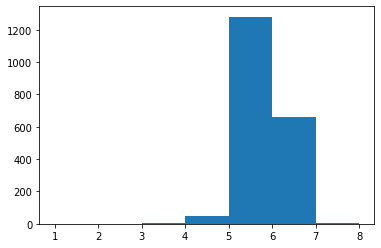

In [85]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [17]:
path = '../data/graph_geom_corrected_cycles.csv'
csv_grafo = pd.read_csv(path, sep=';')

geometry = gpd.read_file(path, GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

path_pesos = '../data/pesos_tapas.csv'
pesos = pd.read_csv(path_pesos)

out = {1003950, 15004, 15131, 1003744, 15190, 1003746, 13730, 1003167, 13731, 13732, 13733, 14062, 1003206, 16503, 13735, 16094, 16095}

S = set()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    if origin not in out and dest not in out:
        S.add(origin)
        S.add(dest)

S = list(S)
id_ = {}; _id = {}; N = 0
for u in S:
    id_[u] = N; _id[N] = u
    N += 1

G = nx.DiGraph()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    if origin not in out and dest not in out:
        G.add_edge(id_[origin], id_[dest])
        
path = '../data/corrected_dijkstra.csv'
csv_grafo = pd.read_csv(path, sep=',')

T = nx.DiGraph()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    if origin not in out and dest not in out:
        T.add_edge(id_[origin], id_[dest])

W = [0] * N

for u in range(N):
    if pesos[pesos['ID_tapa'] == _id[u]].shape[0] >= 1:  ## tomamos primera columna con el id, si no hay peso = 0
        W[u] = pesos[pesos['ID_tapa'] == _id[u]].iloc[0]['per_predio']

In [18]:
mx = 0; root = None
for u in range(N):
    if get_size(G, [0] * N, u) > mx:
        mx = get_size(G, [0] * N, u)
        root = u
        
print(root, get_size(G, [0] * N, root), N)

744 4586 4586


In [23]:
N_ = max(G.nodes()) + 1

# iters = simulate(R, N_, F, r, T.nodes())
W = [100000 for u in range(N_ + 100)]
iters, _ = simulate_robust_randtree(G, r, W, 5, G.nodes(), 0, True, True, False, {})

IndexError: list assignment index out of range